# <font color='darkblue'>EE0005 Mini Project
---
**Group Name**: Alphabeta

**Group members**: Lu Jiaju, Zhang Siqi, Hu Zihao, Xie Xinzhe.

**Dataset chosen**: Rain in Australia.   
**From**: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

**Topic chosen**: Predict whether it will rain tomorrow. (Binary Classification)

**Basic information of the dataset**:
* This dataset contains about 10 years of daily weather observations from many locations across Australia.
* The target variable is RainTomorrow. Rainfall greater than 1mm in a day is considered 'Yes'; otherwise, 'No'.
---
**Methods applied**:
> 1. Decision Tree   
> 2. Random Forest   
> 3. XGBoost   
> 4. Logistic Regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
sb.set()
%matplotlib inline
import plotly.io as pio
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preparation

## 1.1 Data Exploration

In [3]:
weather_df = pd.read_csv('weatherAUS.csv')

In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 1.2 Check the target variable (RainTomorrow)

In [6]:
# Check unique observations in the target col.
weather_df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

<font color=darkblue>**This means that the target variable contains missing values.**</font>

In [7]:
# Number of the missing values.
weather_df['RainTomorrow'].isnull().sum()

3267

<AxesSubplot:xlabel='Number', ylabel='Data'>

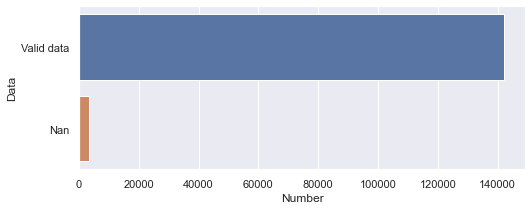

In [8]:
# Compare missing values with valid values by plot
f=plt.figure(figsize=(8,3))
df=pd.DataFrame([['Valid data',len(weather_df['RainTomorrow'])-3267],['Nan',3267]],columns=['Data','Number'])
sb.barplot(y = "Data", x = 'Number', data = df)

In [9]:
# Check the percentage of missing values.
weather_df['RainTomorrow'].isnull().mean()*100

2.245978275814657

<font color=darkblue>**Since it is a relatively small amount of missing value compared to the whole dataset, and it is unreasonable to fill in random values, we choose to delete rows of these missing values from the dataset.**

In [10]:
# Drop missing values
weather_df.dropna(subset=['RainTomorrow'], inplace=True)

In [11]:
# Check the percentage of missing value again.
weather_df['RainTomorrow'].isnull().mean()*100

0.0

In [12]:
weather_df.reset_index(drop=True, inplace=True) # Reindex

## 1.3 Seperating Numeric and Categorical Variables

In [13]:
# Select numeric variables
numeric = []
for cols in weather_df.columns:
    if weather_df[cols].dtype == 'float64':
        numeric.append(cols)

In [14]:
# Viewing numberic variables
weather_df[numeric].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [15]:
# Select Categorical variables
categorical = []
for cols in weather_df.columns:
    if weather_df[cols].dtype == 'object':
        categorical.append(cols)

In [16]:
weather_df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [17]:
# Convert object to category datatype
weather_df[categorical]=weather_df[categorical].astype('category')

## 1.4 Handle Categorical Data

In [18]:
# Counting missing values of each var.
weather_df[categorical].isnull().sum()  

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

### 1.4.1 Separate 'Date' into Year, Month, Day

In [19]:
# Convert the Date variable from string to date format.
weather_df['Date']=pd.to_datetime(weather_df['Date'])

In [20]:
# Creating Year, Month and Day cols in weather_df
weather_df['Year']=weather_df['Date'].dt.year
weather_df['Month']=weather_df['Date'].dt.month
weather_df['Day']=weather_df['Date'].dt.day

In [21]:
# Drop the original Date variable
weather_df.drop(columns='Date', inplace=True)

In [22]:
weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### 1.4.2 Imputation of missing values in categorical data (Wind Direction & Rain Today)

#### Wind Direction

In [23]:
# Extract the three cols of Wind Direction. Then convert them to Boolean Truth Table.
Wind_truthTable = pd.concat([pd.DataFrame(weather_df['WindGustDir'].isnull()), 
           pd.DataFrame(weather_df['WindDir9am'].isnull()), 
           pd.DataFrame(weather_df['WindDir3pm'].isnull())], axis=1)
Wind_truthTable

,WindGustDir,WindDir9am,WindDir3pm
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
142188,False,False,False
142189,False,False,False
142190,False,False,False
142191,False,False,False


In [24]:
# Finding out the rows with more than 1 WindDir loss. (By Boolean Algebra.)
Over_one_missing = Wind_truthTable[(Wind_truthTable['WindGustDir']==True)*(Wind_truthTable['WindDir3pm']==True) +
                      (Wind_truthTable['WindDir3pm']==True)*(Wind_truthTable['WindDir9am']==True) +
                      (Wind_truthTable['WindGustDir']==True)*(Wind_truthTable['WindDir9am']==True)]

In [25]:
Over_one_missing.shape

(4107, 3)

In [26]:
Over_one_missing # True means that the correspond entry is missing. 

,WindGustDir,WindDir9am,WindDir3pm
63,True,False,True
64,True,True,True
181,False,True,True
289,False,True,True
515,False,True,True
...,...,...,...
141823,True,True,True
141824,True,True,True
141825,True,True,True
141826,True,True,True


<font color=darkblue>**We find that the number of rows missing two or three Wind Direction observations in the overall dataset in about 4,000, which is small compared to the entire datatset. Thus, we choose to delete these rows.**

In [27]:
# Deleting rows with 2 or 3 missing wind data.
weather_df.drop(Over_one_missing.index, inplace=True) 

In [28]:
weather_df.reset_index(drop=True, inplace=True) # Reindex

<font color=darkblue>**Now we have a clearer dataset with maximum one missing Wind data. We will proceed to determine how we should deal with these missing values.**

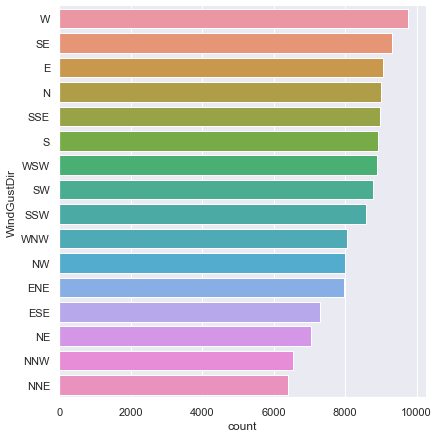

In [29]:
# Check countings of different observations in WindGustDir
weather_df.WindGustDir.value_counts()

sb.catplot(y = "WindGustDir", data = weather_df, kind = "count", height = 6, 
           order = weather_df["WindGustDir"].value_counts().index) 

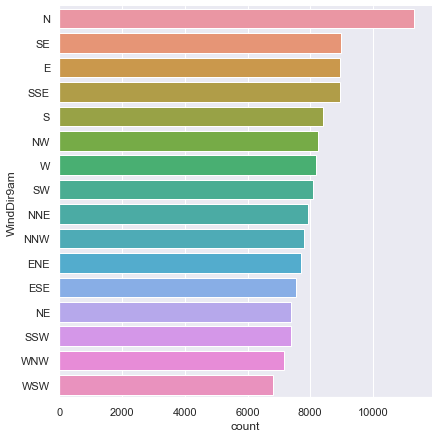

In [30]:
# Check countings of different observations in WindDir9am
weather_df.WindDir9am.value_counts() 

sb.catplot(y = "WindDir9am", data = weather_df, kind = "count", height = 6, 
           order = weather_df["WindDir9am"].value_counts().index)

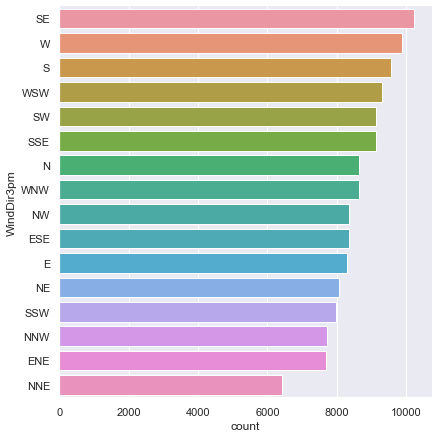

In [31]:
# Check countings of different observations in WindDir3pm
weather_df.WindDir3pm.value_counts() 

sb.catplot(y = "WindDir3pm", data = weather_df, kind = "count", height = 6, 
           order = weather_df["WindDir3pm"].value_counts().index) 

In [32]:
(weather_df['WindGustDir'] == weather_df['WindDir9am']).sum()

28053

In [33]:
(weather_df['WindGustDir'] == weather_df['WindDir3pm']).sum()

41536

In [34]:
(weather_df['WindDir9am'] == weather_df['WindDir3pm']).sum()

23235

<font color=darkblue>Since there are over 10,000 data missing, we cannot simply delete all of them. One of the common but easy method to deal with missing categorical variables is just filling them with the most frequently appeared observation. However, we find that the counting of different observartions are really close to each other, thus, we decided to use a more reasonable way to fill them, i.e., filling the missing wind direction by observations nearby. This filling mechanism also has reasonable meaning in practice, which is based on wind observations from each day.

Based on statistics, we decided to:
1. fill WindGustDir by WindDir3pm, and vice versa;
2. fill WindDir9am by WindGustDir.

In [35]:
# fill na as dicussed above
weather_df.WindGustDir=weather_df.WindGustDir.fillna(weather_df.WindDir3pm)
weather_df.WindDir3pm=weather_df.WindDir3pm.fillna(weather_df.WindGustDir)
weather_df.WindDir9am=weather_df.WindDir9am.fillna(weather_df.WindGustDir)

In [36]:
# Check number of missing values again
weather_df[['WindGustDir', 'WindDir9am', 'WindDir3pm']].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

<font color=darkblue>**Now we have a dataset with no missing Wind data.**

#### Rain Today

In [37]:
# Check number of missing values
weather_df['RainToday'].isnull().sum()

1282

In [38]:
# Show distribution of observations
weather_df['RainToday'].value_counts()

No     106350
Yes     30454
Name: RainToday, dtype: int64

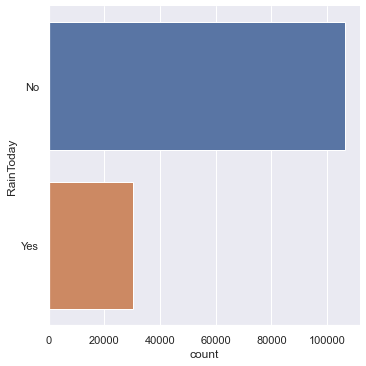

In [39]:
sb.catplot(y = "RainToday", data = weather_df, kind = "count") 

<font color=darkblue>**Here, since the number of 'No' observations overweigh 'Yes', we choose to fill the missing values with the most frequent observation, which is 'No'.**

In [40]:
# Fill missing values with the most frequent observation, i.e. 'No'
weather_df['RainToday'].fillna(weather_df['RainToday'].mode()[0], inplace=True)

In [41]:
# Check missing values again
weather_df['RainToday'].isnull().sum()

0

## 1.5 Handle Numberic Data

In [42]:
# check missing values of each numeric var
weather_df[numeric].isnull().sum()

MinTemp            267
MaxTemp            127
Rainfall          1282
Evaporation      57888
Sunshine         64367
WindGustSpeed     5492
WindSpeed9am       278
WindSpeed3pm       203
Humidity9am       1356
Humidity3pm       1841
Pressure9am      11356
Pressure3pm      11299
Cloud9am         52433
Cloud3pm         54508
Temp9am            551
Temp3pm           1011
dtype: int64

In [43]:
# check the distribution of each numeric var
round(weather_df[numeric].describe())

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,137819.0,137959.0,136804.0,80198.0,73719.0,132594.0,137808.0,137883.0,136730.0,136245.0,126730.0,126787.0,85653.0,83578.0,137535.0,137075.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,51.0,1018.0,1015.0,4.0,5.0,17.0,22.0
std,6.0,7.0,8.0,4.0,4.0,14.0,9.0,9.0,19.0,21.0,7.0,7.0,3.0,3.0,7.0,7.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.0,977.0,0.0,0.0,-7.0,-5.0
25%,8.0,18.0,0.0,3.0,5.0,31.0,7.0,13.0,57.0,36.0,1013.0,1010.0,1.0,2.0,12.0,17.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,1018.0,1015.0,5.0,5.0,17.0,21.0
75%,17.0,28.0,1.0,7.0,11.0,48.0,19.0,24.0,83.0,65.0,1022.0,1020.0,7.0,7.0,22.0,26.0
max,34.0,48.0,371.0,86.0,14.0,135.0,87.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,47.0


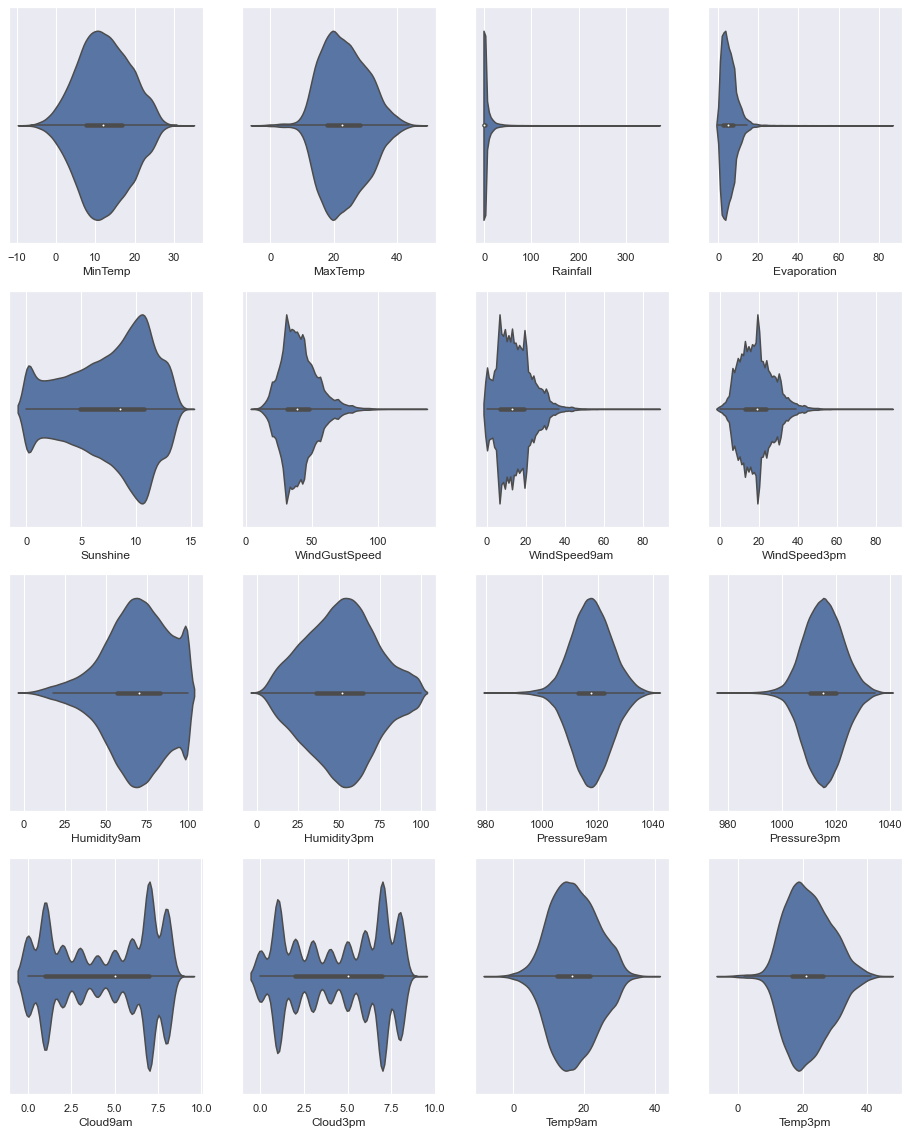

In [44]:
# Draw the distribution of all numeric variables
f, axes = plt.subplots(4,4, figsize=(16,20)) 

for i in range(0,16):
    plt.subplot(4,4,i+1)
    sb.violinplot(x=numeric[i],data=weather_df,orient="h") 

### 1.5.1 Imputation of Missing Numerical Values

In [45]:
# median imputation
for col in numeric:
    weather_df[col].fillna(weather_df[col].median(), inplace=True)

In [46]:
# check missing value after imputation
weather_df[numeric].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### 1.5.2 Process Outliers of Numerical Values

<font color=darkblue>**From distribution of all numerical variables above, we can see 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm' these five variables have a lot of outliers. Therefore, we mainly focus on these five columns**

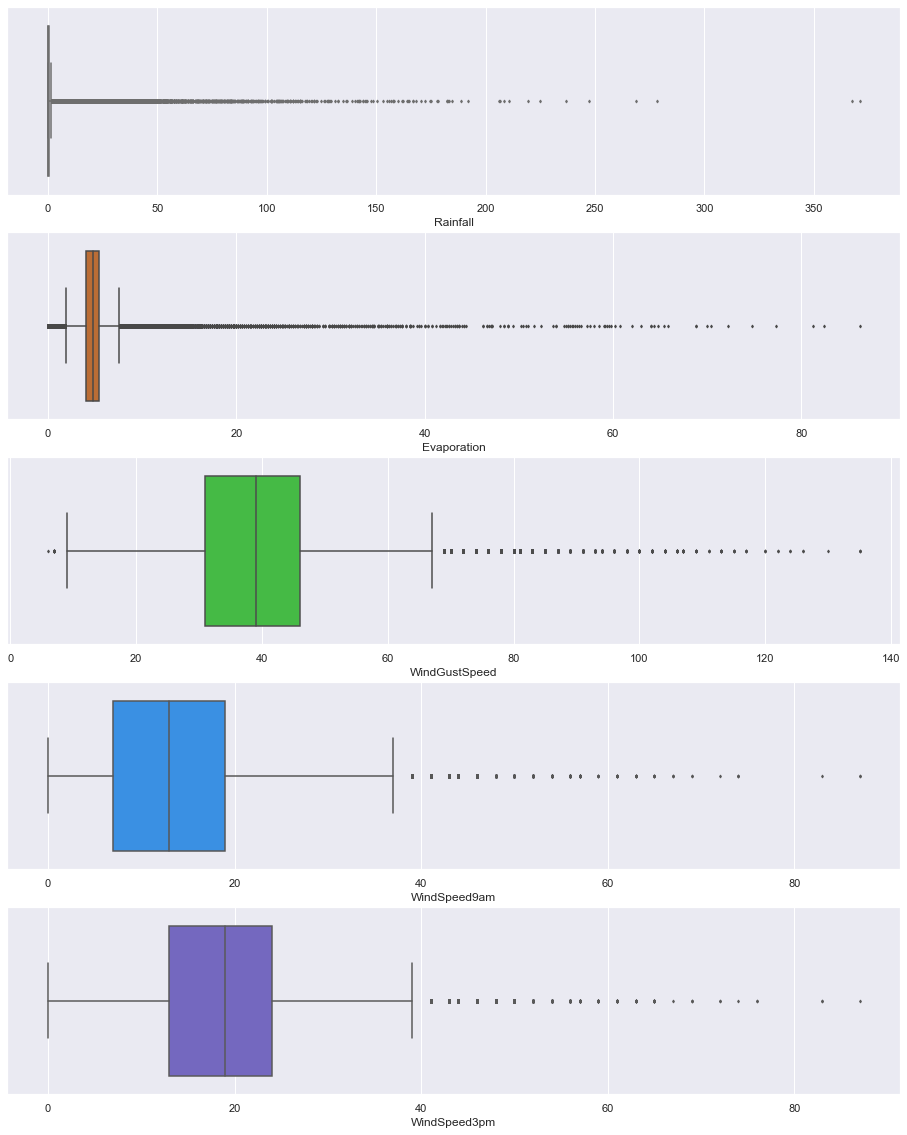

In [47]:
# Draw the boxplot of the five variables
colms=['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
color=['lightcoral','chocolate','limegreen','dodgerblue','slateblue']
f, axes = plt.subplots(5,1, figsize=(16,20)) 

for i in range(1,6):
    plt.subplot(5,1,i)
    sb.boxplot(x=colms[i-1],data=weather_df,orient='h', color=color[i-1],fliersize=2)

In [48]:
# Find outlier boundaries

for col in colms:
    IQR = weather_df[col].quantile(0.75) - weather_df[col].quantile(0.25)
    Lower = weather_df[col].quantile(0.25) - (IQR * 3)
    Upper = weather_df[col].quantile(0.75) + (IQR * 3)
    print(col+' outliers are values < {lowerboundary:.2f} or > {upperboundary:.2f}'.
          format(lowerboundary=Lower, upperboundary=Upper))

Rainfall outliers are values < -1.80 or > 2.40
Evaporation outliers are values < -0.20 or > 9.60
WindGustSpeed outliers are values < -14.00 or > 91.00
WindSpeed9am outliers are values < -29.00 or > 55.00
WindSpeed3pm outliers are values < -20.00 or > 57.00


In [49]:
# Replace outliers with boundary values
weather_df['Rainfall']=np.where(weather_df['Rainfall']>2.4, 2.4, weather_df['Rainfall'])
weather_df['Evaporation']=np.where(weather_df['Evaporation']>9.6, 9.6, weather_df['Evaporation'])
weather_df['WindGustSpeed']=np.where(weather_df['WindGustSpeed']>91, 91, weather_df['WindGustSpeed'])
weather_df['WindSpeed9am']=np.where(weather_df['WindSpeed9am']>55, 55, weather_df['WindSpeed9am'])
weather_df['WindSpeed3pm']=np.where(weather_df['WindSpeed3pm']>57, 57, weather_df['WindSpeed3pm'])

In [50]:
# check values after replacement
weather_df[colms].max()

Rainfall          2.4
Evaporation       9.6
WindGustSpeed    91.0
WindSpeed9am     55.0
WindSpeed3pm     57.0
dtype: float64

## 1.6 Declare Predictors and Target

In [51]:
X=weather_df.drop(columns=['RainTomorrow'])
y=pd.DataFrame(weather_df['RainTomorrow'])

## 1.7 Split Train and Test set

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
#reindex train and test sets
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

<font color=blue>***We now finished the data preparation!***</font>

## 1.8 One Hot Encoding of Categorical Variables

In [54]:
weather_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138081,Uluru,3.5,21.8,0.0,4.8,8.5,E,31.0,ESE,E,...,1021.2,5.0,5.0,9.4,20.9,No,No,2017,6,20
138082,Uluru,2.8,23.4,0.0,4.8,8.5,E,31.0,SE,ENE,...,1020.3,5.0,5.0,10.1,22.4,No,No,2017,6,21
138083,Uluru,3.6,25.3,0.0,4.8,8.5,NNW,22.0,SE,N,...,1019.1,5.0,5.0,10.9,24.5,No,No,2017,6,22
138084,Uluru,5.4,26.9,0.0,4.8,8.5,N,37.0,SE,WNW,...,1016.8,5.0,5.0,12.5,26.1,No,No,2017,6,23


In [55]:
# One hot encode of RainToday
pd.get_dummies(weather_df.RainToday).head()
# This is just an illustration of the result of One Hot Encoding.

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [56]:
# One hot encode categorical variables in X_train
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)

var_list = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']

for var in var_list:
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[[var]]))
    X_train_encoded.columns = encoder.get_feature_names([var])
    X_train.drop([var] ,axis=1, inplace=True)
    X_train=pd.concat([X_train_encoded, X_train], axis=1)
    
X_train

,RainToday_No,RainToday_Yes,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,34.0,1026.5,1021.5,1.0,0.0,9.8,20.4,2012,7,17
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,54.0,1026.8,1021.0,7.0,7.0,10.2,14.3,2015,7,21
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,66.0,1025.1,1021.9,8.0,5.0,9.3,15.9,2010,5,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,77.0,1012.3,1008.1,5.0,5.0,23.2,24.7,2013,1,17
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,1010.2,1008.7,6.0,5.0,13.3,18.1,2011,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110463,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49.0,1018.9,1017.1,8.0,7.0,16.5,22.9,2008,2,1
110464,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,1021.5,1020.4,8.0,8.0,8.8,12.4,2010,10,17
110465,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,1021.6,1017.2,7.0,7.0,4.4,10.4,2014,7,23
110466,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,1017.6,1015.2,5.0,5.0,26.4,35.7,2012,1,21


In [57]:
# One hot encode X_test
for var in var_list:
    X_test_encoded = pd.DataFrame(encoder.fit_transform(X_test[[var]]))
    X_test_encoded.columns = encoder.get_feature_names([var])   
    X_test.drop([var] ,axis=1, inplace=True)
    X_test=pd.concat([X_test_encoded, X_test], axis=1)

<font color=darkblue>**finish one hot encoding.**

# 2. Decesion Tree

## 2.1 Train the model without parameters tuning

In [60]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

dectree=DecisionTreeClassifier(random_state=5
                                ,max_depth=30               #Randomly select a depth for decesion tree
                                #,splitter='random'
                                # ,min_samples_leaf=2
                                #,min_samples_split=15 
                                 )                          #Create the decision tree object
dectree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, random_state=5)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9970398667487417

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7928886957781157



<AxesSubplot:>

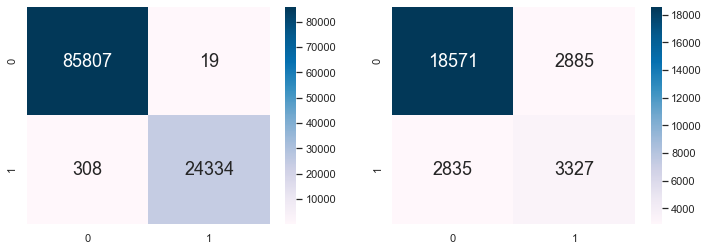

In [61]:
# Predict RainTomorrow values
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap='PuBu')
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap='PuBu')

<font color=blue>**Obviously, there is an issue of overfitting!**</font>

In [60]:
# Check feature importances

# Saving feature names for later use
feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(dectree.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: Humidity3pm                    Importance: 0.2724
Feature: WindGustSpeed                  Importance: 0.0634
Feature: Pressure3pm                    Importance: 0.0579
Feature: Sunshine                       Importance: 0.0442
Feature: MinTemp                        Importance: 0.0363
Feature: Humidity9am                    Importance: 0.0356
Feature: Pressure9am                    Importance: 0.0328
Feature: Day                            Importance: 0.0311
Feature: Temp3pm                        Importance: 0.0298
Feature: Temp9am                        Importance: 0.0296
Feature: MaxTemp                        Importance: 0.0274
Feature: WindSpeed3pm                   Importance: 0.027
Feature: Rainfall                       Importance: 0.0248
Feature: WindSpeed9am                   Importance: 0.0247
Feature: Month                          Importance: 0.0215
Feature: Year                           Importance: 0.02
Feature: Evaporation                    Importance: 0.0198


<font color=blue>***Humidity3pm is the most important feature!***</font>

## 2.2 Hyperparameter Tuning of Decision Trees

<font color=darkblue>Due to the cost of time, we are not going to apply Grid Search for all the hyperparameters altogether. While, this method is still included in the last part of 2.2. We decide to use various techniques to explore the optimized hyperparamters.The hyperparameters which we are going to tune are listed below with the corresponding techniques applied:
1. max_depth (cross_validation learning curve)
2. min_samples_leaf (Grid Search)
3. min_samples_split (Grid Search)
4. max_features (Grid Search)

### 2.2.1 max_depth (cross_validation learning curve)

<font color=blue>***In order to minimise the influence of the split of the train and test dataset, we use cross validation(Stratified K-fold cross-validation) to observe the stability of the Decesion Tree model.***</font>

In [61]:
from sklearn.model_selection import cross_val_score

# Convert the dataframe to numpy arrays. cross_val_score only accepts array or list inputs. 
X_train_array=X_train.to_numpy()

y_train_array=y_train.to_numpy()
y_train_array = y_train_array.flatten()
# Concvert y to 1D array

In [62]:
# Check the input array
X_train_array

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 7.000e+00,
        1.700e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.015e+03, 7.000e+00,
        2.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.010e+03, 5.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.014e+03, 7.000e+00,
        2.300e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.012e+03, 1.000e+00,
        2.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.013e+03, 4.000e+00,
        1.400e+01]])

Highest Classification Accuracy 		: 0.8409132036227087
Corresponding Depth of Decesion Tree 	: 8


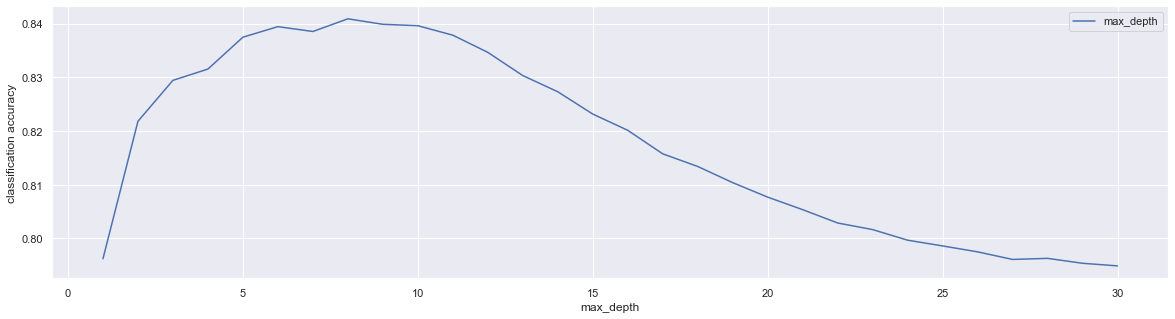

In [63]:
# Learning curve for max_depth
scorelist = []
for i in range(0,30):
    dectree = DecisionTreeClassifier(max_depth=i+1
                                    ,random_state=5
                                    ,criterion='entropy'
                                    #,splitter="random"
                                    )

    score = cross_val_score(dectree,X_train_array,y_train_array,cv=10).mean()               #cv=10 cross validation 10 times
    scorelist.append(score)


    
print("Highest Classification Accuracy \t\t:",max(scorelist))
print("Corresponding Depth of Decesion Tree \t:",(scorelist.index(max(scorelist))+1))
plt.figure(figsize=[20,5])
plt.plot(range(1,31),scorelist,label="max_depth")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('classification accuracy')
plt.show()

<font color=blue>***We decide to use max_depth=8 in the following models.***

### 2.2.2 min_samples_leaf (Grid Search)

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [65]:
# Set the range for min_samples_leaf to apply Grid Search
param_grid1 = {'min_samples_leaf':np.arange(1,51,5)}                  # min_samples_leaf(default=1)

dectree = DecisionTreeClassifier(max_depth=8
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid1, cv=10)
GS.fit(X_train_array,y_train_array)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              random_state=5),
             param_grid={'min_samples_leaf': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])})

In [66]:
GS.best_params_

{'min_samples_leaf': 6}

In [67]:
GS.best_score_

0.8409765725203462

<font color=blue>***We decide to use min_samples_leaf=6 in the following models.***

### 2.2.3 min_samples_split (Grid Search)

In [68]:
# Set the range for min_samples_split to apply Grid Search
param_grid2 = {'min_samples_split':np.arange(1,21)}                    # min_samples_split(default=2)
dectree = DecisionTreeClassifier(max_depth=8
                                ,min_samples_leaf=6
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid2, cv=10)
GS.fit(X_train_array,y_train_array)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              min_samples_leaf=6,
                                              random_state=5),
             param_grid={'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [69]:
GS.best_params_

{'min_samples_split': 2}

In [70]:
GS.best_score_

0.8409765725203462

<font color=darkred>***Notice that for min_samples, default=2. The accuracy remains the same as the result of the last Grid Search. Hence, tuning min_samples_split is not helpful to improve the accuracy!!!***</font>

### 2.2.4 max_features (Grid Search)

In [71]:
# Set the range for max_features to apply Grid Search
param_grid3 = {'max_features':[None, 'log2','sqrt']}        # max_features(default=None, max_features=n_features)
                                                            # For this dataset, n_feature=118
dectree = DecisionTreeClassifier(max_depth=8                # If “sqrt”, then max_features=sqrt(n_features)
                                ,min_samples_leaf=6         # If “log2”, then max_features=log2(n_features)
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid3, cv=10, n_jobs=-1)
GS.fit(X_train_array,y_train_array)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              min_samples_leaf=6,
                                              random_state=5),
             param_grid={'max_features': [None, 'log2', 'sqrt']})

In [72]:
GS.best_params_

{'max_features': None}

In [73]:
GS.best_score_

0.8409765725203462

<font color=darkred>Notice that for max_features, default=None. The accuracy remains the same as the result of the last Grid Search. Based on the tuning of max_depth and min_samples_leaf previously, the model seems overfit the data.
Hence, we decide to:
1. Step1:
Apply grid search to max_features by setting the range of max_features to an interval such that all the points in the interval has a smaller value than default(which is 118)  i.e. np.arange(51,101,5)
2. Step2:
    Apply grid search again with smaller steps inside an interval that centers at best_params_ found in last step

###### step1

In [74]:
# Set the range for max_features to apply Grid Search
# Since, we have tried 'log2' and auto(sqrt) which are around 11, we choose the interval be(51,101,5)

param_grid4 = {'max_features':np.arange(51,101,5)}          # max_features(default=None, max_features=n_features)
                                                            # For this dataset, n_feature=118
dectree = DecisionTreeClassifier(max_depth=8                # If “sqrt”, then max_features=sqrt(n_features)
                                ,min_samples_leaf=6         # If “log2”, then max_features=log2(n_features)
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid4, cv=10, n_jobs=-1)
GS.fit(X_train_array,y_train_array)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              min_samples_leaf=6,
                                              random_state=5),
             param_grid={'max_features': array([51, 56, 61, 66, 71, 76, 81, 86, 91, 96])})

In [75]:
GS.best_params_

{'max_features': 96}

In [76]:
GS.best_score_

0.842117186453725

<font color=darkred>***Notice that the accuracy increases. We may proceed to step 2.***</font>

###### step2

In [78]:
# Set the range for max_features to apply Grid Search
param_grid6 = {'max_features':np.arange(91,105)}         # max_features(default=None, max_features=n_features)
                                                            # For this dataset, n_feature=118
dectree = DecisionTreeClassifier(max_depth=8                # If “sqrt”, then max_features=sqrt(n_features)
                                ,min_samples_leaf=6         # If “log2”, then max_features=log2(n_features)
                                ,random_state=5
                                ,criterion='entropy'
                                #,splitter="random"
                                    )


GS = GridSearchCV(dectree, param_grid6, cv=10, n_jobs=-1)
GS.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              min_samples_leaf=6,
                                              random_state=5),
             n_jobs=-1,
             param_grid={'max_features': array([ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104])})

In [79]:
GS.best_params_

{'max_features': 96}

In [80]:
GS.best_score_

0.842117186453725

<font color=blue>***The higherst accuracy inside the chosen parameter range still occurs at max_featurs=96. We decide to use max_features=96 in the following models.***

## 2.3 Conclusion for Decision Tree

<font color=darkblue> Compare the classfication accuracy of the decesion tree model on the test set by using different techniques of hyperparameters tuning:
> Learnig curve and Grid Search for the parameters respectively==>     84.4087189514085%       
> Grid Search for all the hyperparameters==>                   84.02129046274169% 

<font color=darkblue>***Thus, we decide to use the parameters listed below obtained from learnig curve and grid Search for the parameters respectively to train the decision tree model.***

In [59]:
dectree = DecisionTreeClassifier(max_depth=8                
                                ,min_samples_leaf=6         
                                ,random_state=5
                                ,max_features=96
                                ,criterion='entropy'
                                )
dectree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=96,
                       min_samples_leaf=6, random_state=5)

In [60]:
# Predict RainTomorrow values 
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8483633269363073

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.844087189514085



In [61]:
# Visualization of confusion matrix of test data (with summary statistics)

Reference:https://github.com/DTrimarchi10/confusion_matri
'''
>    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

>    Arguments
>    ------------

>    cf:            confusion matrix to be passed in

>    group_names:   List of strings that represent the labels row by row to be shown in each square.

>    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

>    count:         If True, show the raw number in the confusion matrix. Default is True.

>    normalize:     If True, show the proportions for each category. Default is True.

>    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

>    xyticks:       If True, show x and y ticks. Default is True.

>    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

>    sum_stats:     If True, display summary statistics below the figure. Default is True.

>    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

>    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
>    title:         Title for the heatmap. Default is None.


In [66]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=(10,6))
    sb.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

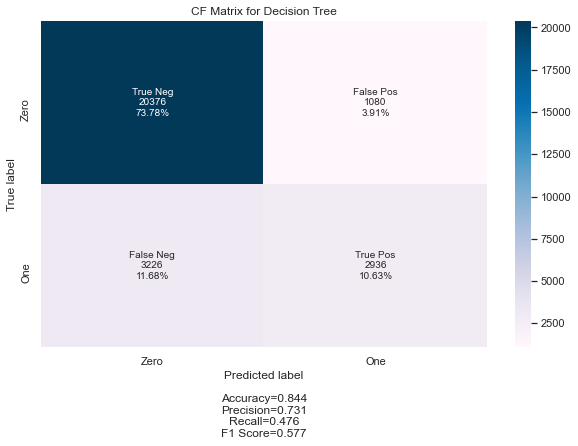

In [67]:
cf_matrix=confusion_matrix(y_test, y_test_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, cmap='PuBu', title='CF Matrix for Decision Tree')

# 3. Random Forest

In [62]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## 3.0 Contrast of decision Tree and Random Forest

<font color=blue>***In this part, we are going to briefly compare the classification accuracy of Decision Tree and Random Forest without parameter tuning to show Random Forest is more vigorous. We will still use cross_validation.***

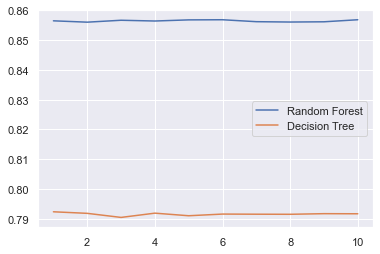

In [91]:
rfc_list = []
dectree_list = []
 
for i in range(10):
    # Create random forest object
    rfc = RandomForestClassifier()     
    
    rfc_s = cross_val_score(rfc,X_train,y_train,cv=10, n_jobs=-1).mean()
    rfc_list.append(rfc_s)
    
    # Create decision tree object
    dectree = DecisionTreeClassifier()
    
    dectree_s = cross_val_score(dectree,X_train,y_train,cv=10,n_jobs=-1).mean()
    dectree_list.append(dectree_s)
    
plt.plot(range(1,11),rfc_list,label = "Random Forest")
plt.plot(range(1,11),dectree_list,label = "Decision Tree")
plt.legend()
plt.show()

<font color=blue>***Clearly, it is indicated that Random forest usually has a higher accuracy than Decision Tree.***

## 3.1 Train the model

In [92]:
rfc=RandomForestClassifier(random_state=50
                            ,n_estimators=30                 #Randomly select n_estimators for Random forest
                                                             #n_estimator(default=100)
                            # ,min_samples_leaf=2
                            #,min_samples_split=15 
                                 )                          #Create the Random Forest object
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30, random_state=50)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9986602455009596

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8556014193641828



<AxesSubplot:>

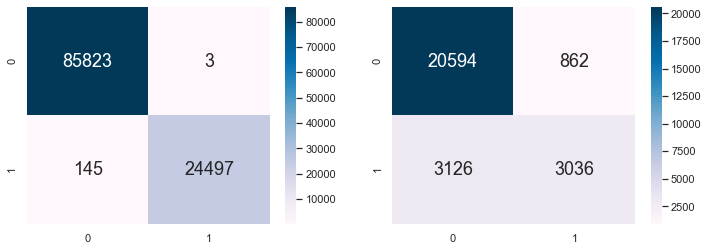

In [93]:
# Predict RainTomorrow values
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap='PuBu')
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap='PuBu')

<font color=blue>***Obviously, there still exists an issue of overfitting even when we use Random Forest.***</font>

In [94]:
# Check featuer importances

# Saving feature names for later use
feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Feature: Humidity3pm                    Importance: 0.1214
Feature: Pressure3pm                    Importance: 0.0525
Feature: WindGustSpeed                  Importance: 0.0499
Feature: Sunshine                       Importance: 0.0485
Feature: Humidity9am                    Importance: 0.0482
Feature: Pressure9am                    Importance: 0.046
Feature: Temp3pm                        Importance: 0.0421
Feature: MinTemp                        Importance: 0.039
Feature: MaxTemp                        Importance: 0.0376
Feature: Cloud3pm                       Importance: 0.0372
Feature: Temp9am                        Importance: 0.0358
Feature: Rainfall                       Importance: 0.0339
Feature: Day                            Importance: 0.0289
Feature: WindSpeed3pm                   Importance: 0.028
Feature: WindSpeed9am                   Importance: 0.0267
Feature: Cloud9am                       Importance: 0.0248
Feature: Month                          Importance: 0.0219


## 3.2 Hyperparameter Tuning of Random Forest

<font color=darkblue>Due to the cost of time, we are not going to apply Grid Search for all the hyperparameters altogether. We decide to use various techniques to explore the optimized hyperparamters.The hyperparameters which we are going to tune are listed below with the corresponding techniques applied:
1. n_estimators (obb_score learning curve)
2. max_depth (oob-score learning curve)
3. min_samples_leaf (RandomizedSearchCV)
4. min_samples_split (RandomizedSearchCV)
5. max_features (GridSearch/RandomizedSearchCV/)

### 3.2.1 n_estimators (oob-score learning curve)

<font color=blue>***The parameter n_estimators is the number of trees in the forest. This parameter is monotonic.(i.e. the accuracy will keep increasing with the increase of n_estimators) While, it will eventually reach a certain value where the accuracy of the model begins flutuating mildly after that point. Thus, we decide to use learning curve to observe the trend of the accuracy with the increase of n_estimators.***</font>

<font color=darkred>Instead of using cross_validation to eliminate the influence to the split of the train and test set, we are going to use oob_score_(out of bag data) as the metrics to evaluate the performance of the model on the unknown data. This oob_score_ attribute comes from the characteristic of Random Forest which is bootstrap. All the decision trees are trained using different train sets which are drawn from the dataset with replacement. Thus, the idea of the oob_score is pretty much the same as cross validation. Both of them are used to minimise the generalization error. To speed up the searching of the optimized parameters. We use oob_score_.

0.8568001593221567 178


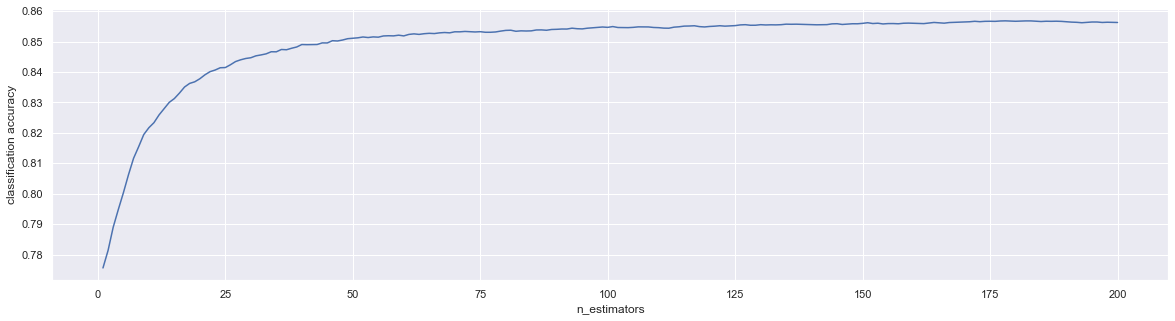

In [63]:
#####【TIME WARNING:1h】#####
superpa = []
for i in range(0,200):
    rfc = RandomForestClassifier(n_estimators=i+1
                                 ,random_state=50
                                 ,oob_score=True
                                 ,n_jobs=-1)
    rfc.fit(X_train,y_train)
    rfc_s = rfc.oob_score_
    superpa.append(rfc_s)

print(max(superpa),superpa.index(max(superpa))+1)      
#print out：max(superpa)=maximum accuracy from list(superpa)
#print out：superpa.index(max(superpa))+1  is the value of n_estimators with the highest accuracy

# Plot the learning curve
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.xlabel('n_estimators')
plt.ylabel('classification accuracy')
plt.show()

<font color=blue>***Since the accuracy of the model begins stagnating after a certain value around 70 and n_estimator with highest accuracy appears at 178,we decide to use n_estimators=178 in the following models.***</font>

### 3.2.2 max_depth (oob_score learning curve)

<font color=blue>***As shown in 3.1, the model obtained without hyperparameter tuning has an issue with overfitting. Thus, it is reasonable to do prunig for the decision trees in the forests. We decide to use learnig curve to observe the trend of accuracy with various max_depth in order to get an optimized max_depth to limit the growth of the trees as well as to alleviate the issue of overfitting.***</font>

Highet Classification Accuracy 		: 0.8568001593221567
Corresponding Number of the Trees 	: 61


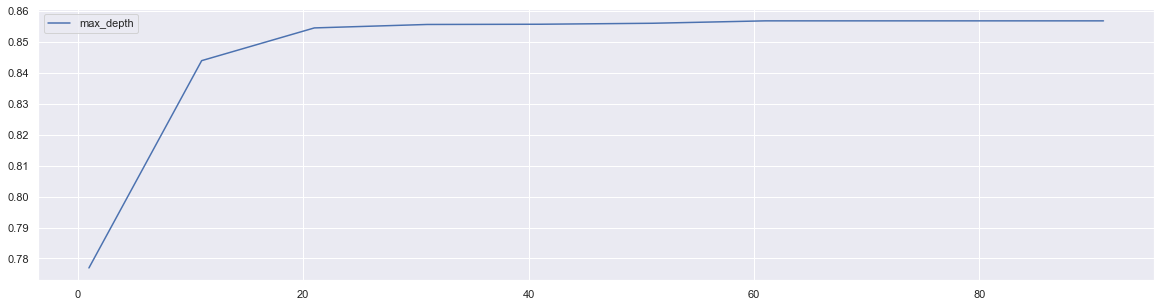

In [96]:
scorelist1 = []
for i in range(0,100,10):
    rfc = RandomForestClassifier(max_depth=i+1
                                ,random_state=50
                                ,n_estimators=178
                                ,oob_score=True
                                ,n_jobs=-1
                                )

    rfc.fit(X_train,y_train)
    score=rfc.oob_score_
    scorelist1.append(score)


    
print("Highet Classification Accuracy \t\t:",max(scorelist1))
print("Corresponding Number of the Trees \t:",(scorelist1.index(max(scorelist1))*10+1))
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),scorelist1,label="max_depth")
plt.legend()
plt.show()

Highet Classification Accuracy 		: 0.8568001593221567
Corresponding Depth of the Tree 	: 61


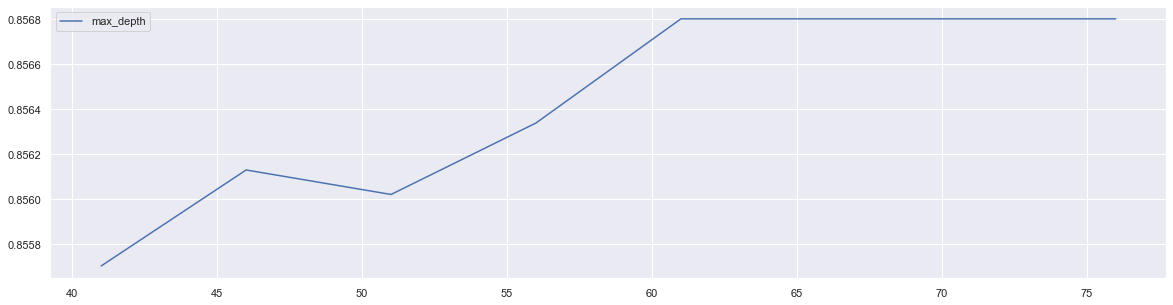

In [97]:
scorelist2 = []
for i in range(41,81,5):
    rfc = RandomForestClassifier(max_depth=i
                                ,random_state=50
                                ,n_estimators=178
                                ,oob_score=True
                                ,n_jobs=-1
                                )

    rfc.fit(X_train,y_train)
    score=rfc.oob_score_
    scorelist2.append(score)


    
print("Highet Classification Accuracy \t\t:",max(scorelist2))
print("Corresponding Depth of the Tree \t:",(scorelist2.index(max(scorelist2))*5+41))
plt.figure(figsize=[20,5])
plt.plot(range(41,81,5),scorelist2,label="max_depth")
plt.legend()
plt.show()

<font color=blue>***Since the accuracy of the model is the same as the accuracy before we tune max_depth,tuning max_depth is not able to improve the accuracy.***</font>

### 3.2.3 min_samples_leaf (RandomizedSearchCV)

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [99]:
#####【TIME WARNING:30min】#####
parameters_grid1 ={'min_samples_leaf':[int(x) for x in np.linspace(1,100,10)]}
rfc = RandomForestClassifier(max_depth=61
                            ,random_state=50
                            ,n_estimators=178
                            ,n_jobs=-1
                            )

GS = RandomizedSearchCV(rfc,parameters_grid1,cv=10,n_jobs=-1)
GS.fit(X_train,y_train)

print(GS.best_params_)
print(GS.best_score_)
#GS.cv_results_

{'min_samples_leaf': 1}
0.8569630884817018


<font color=blue>***We decide to use min_samples_leaf=1(default) in the following models.***</font>

### 3.2.4 min_samples_split (RandomizedSearchCV)

In [100]:
#####【TIME WARNING:30min】#####
parameters_grid2 ={'min_samples_split':[int(x) for x in np.linspace(2,50,20)]}

rfc = RandomForestClassifier(max_depth=61
                            ,random_state=50
                            ,n_estimators=178
                            ,min_samples_leaf=1                        
                            ,n_jobs=-1
                            )

GS = RandomizedSearchCV(rfc,parameters_grid2,cv=10,n_jobs=-1)
GS.fit(X_train,y_train)

print(GS.best_params_)
print(GS.best_score_)
#GS.cv_results_

{'min_samples_split': 2}
0.8569630884817018


<font color=blue>***We decide to use min_samples_split=2(default) in the following models.***</font>

### 3.2.5 max_feature(GridSearch/learnig curve)

In [101]:
# First, we will do GridSearch with paramters range{None,auto,log2}
# None: max_feature=n_feature In our dataset, n_feature=118
# auto(default): max_feature=sqrt(n_feature) approximately equal to 11
# log2: max_feature=log2(n_feature) approximately equal to 7

parameters_grid3 ={'max_features':[None,'auto','log2']}
rfc = RandomForestClassifier(max_depth=61
                            ,random_state=50
                            ,n_estimators=178
                            ,min_samples_leaf=1
                            ,min_samples_split=2
                            ,n_jobs=-1
                            )

GS = GridSearchCV(rfc,parameters_grid3,cv=10,n_jobs=-1)
GS.fit(X_train,y_train)

print(GS.best_params_)
print(GS.best_score_)
#GS.cv_results_

{'max_features': None}
0.8573070888445121


<font color=blue>***As stated before, the default for max_features is 'auto' which is about 11 features for our dataset and if max_features=None, every estimator(decision tree) in Rnadom Forest will consider n_features(118) when spliting. However, the accuracy of the model with max_features=None is greater than the acciracy when that is 'auto'. It indicates that the model before we tune max_features is  underfitting. The increase of the features will increase the complexity of the model and hence reduce the bias error.***</font>

<font color=blue>***To find a more appropriate value,we decide to exploit learning curve to study the trend of the accuracy with max_features increasing from 11(default).***

Highet Classification Accuracy 		: 0.8585291589287134
Corresponding Number of features 	: 61


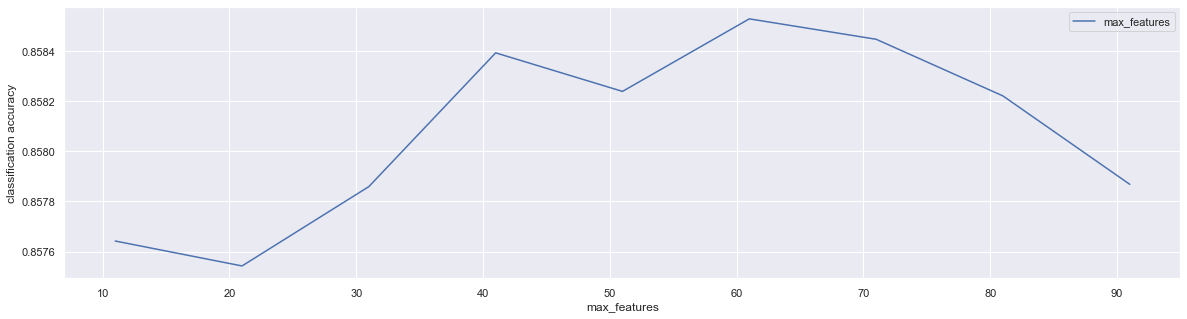

In [102]:
scorelist3 = []
for i in range(11,101,10):
    rfc = RandomForestClassifier(max_depth=61
                                ,random_state=50
                                ,n_estimators=178
                                ,min_samples_leaf=1
                                ,min_samples_split=2 
                                #,oob_score=True
                                ,max_features=i
                                ,n_jobs=-1
                                )

    
    score=cross_val_score(rfc,X_train,y_train,cv=10).mean()                             #cv=10 cross validation 10 times
    scorelist3.append(score)
                          

    
print("Highet Classification Accuracy \t\t:",max(scorelist3))
print("Corresponding Number of features \t:",(scorelist3.index(max(scorelist3))*10+11))
plt.figure(figsize=[20,5])
plt.plot(range(11,101,10),scorelist3,label="max_features")
plt.legend()
plt.xlabel('max_features')
plt.ylabel('classification accuracy')
plt.show()

<font color=blue>***Initially, when max_feature='auto'(11), the model is underfitting. The accuracy grows as a result of increasing features for the bias error is reduced. After a certain value around 64, the accuracy begins declining which suggests the overfitting is getting more and more evident. We decide to use max_features=61(default) in the following models.***

## 3.3 Conclusion for Random Forest

<font color=darkblue>***Finally, we decide to use the parameters listed below obtained from learnig curve and grid Search for the parameters respectively to train the random forest model.***

In [104]:
rfc = RandomForestClassifier(max_depth=61
                            ,random_state=50
                            ,n_estimators=178
                            ,min_samples_leaf=1
                            ,min_samples_split=2 
                            #,oob_score=True
                            ,max_features=61
                            ,n_jobs=-1
                            )

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=61, max_features=61, n_estimators=178,
                       n_jobs=-1, random_state=50)

In [105]:
# Predict RainTomorrow values 
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8593670794409443



In [106]:
# Visualization of confusion matrix of test data (with summary statistics)

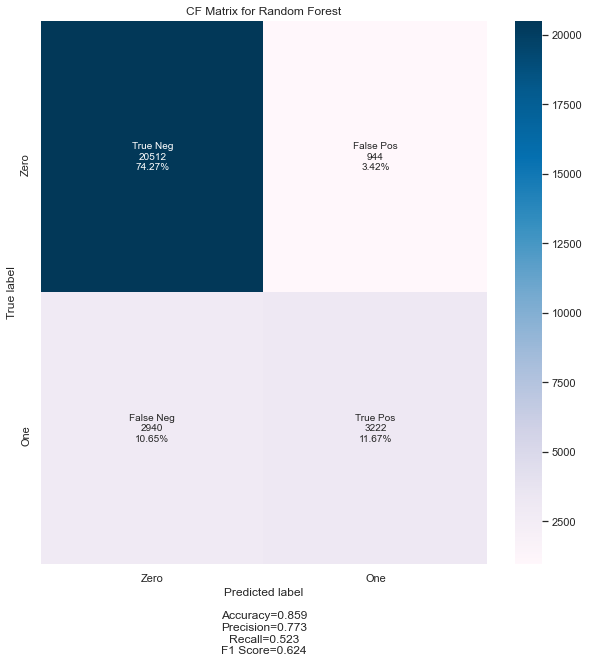

In [107]:
cf_matrix=confusion_matrix(y_test, y_test_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, group_names=labels, categories=categories, cmap='PuBu', title='CF Matrix for Random Forest')

# 4. XGBoost

## 4.1 Import Packeges 

In [62]:
#import xgboost for modeling
import xgboost as xgb
# import packeges for analysis
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, precision_score as precision, roc_auc_score as auc, confusion_matrix as cm
from time import time
import datetime

## 4.2 Model Training using xgboost

### 4.2.1 Prepare Data for xgboost 

In [174]:
# Convert 'Yes'/'No' to 1/0
y_test.replace(('Yes', 'No'), (1, 0), inplace=True)
y_train.replace(('Yes', 'No'), (1, 0), inplace=True)

#using Dmatrix to read data
d_train = xgb.DMatrix(X_train, y_train)
d_test = xgb.DMatrix(X_test, y_test)

### 4.2.2 Model Optimization (adjust num_round)

In [63]:
#Set all parameters to default and find suitable number for num_round 
param_original = {'silent':True
                  ,'obj':'binary:logistic'
                  ,"subsample":1
                  ,"max_depth":6
                  ,"eta":0.3
                  ,"gamma":0
                  ,"lambda":1
                  ,"alpha":0
                  ,"colsample_bytree":1
                  ,"colsample_bylevel":1
                  ,"colsample_bynode":1
                  ,"nfold":5}
num_round = 2000
cvresult_original = xgb.cv(param_original, d_train, num_round, metrics=("error"))
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,2001),cvresult_original.iloc[:,0],c="red",label="train,original")
plt.plot(range(1,2001),cvresult_original.iloc[:,2],c="orange",label="test,original")
plt.legend()
plt.show()

<font color=darkblue>**From graph, we could see that the curves tend to be flat after 1500, so we choose num_round to be 1500 to speed up the modeling without harming the accuracy**

<font color=darkblue>Following codes are used to draw plots for errors of default parameters, previously used parameters and newly adjusted parameters, so as to find the best combinition of parameters that have both the high accuracy and high generalization ability

### 4.2.3 Model Optimization (adjust other parameters)

<font color=darkblue> Aujusted parameters:
> subsample, max_depth, eta, gamma, lambda, alpha, colsample_bytree, colsample_bylevel, colsample_bynode

In [64]:
%%time

# Default parameters
param_original = {'silent':True
                  ,'obj':'binary:logistic'
                  ,"subsample":1
                  ,"max_depth":6
                  ,"eta":0.3
                  ,"gamma":0
                  ,"lambda":1
                  ,"alpha":0
                  ,"colsample_bytree":1
                  ,"colsample_bylevel":1
                  ,"colsample_bynode":1
                  ,"nfold":5}
# Use param_last to record the parameters used last time 
param_last = {'silent':True
              ,'obj':'binary:logistic'
              ,"subsample":1
              ,"max_depth":2
              ,"eta":0.15
              ,"gamma":0
              ,"lambda":1
              ,"alpha":0
              ,"colsample_bytree":1
              ,"colsample_bylevel":1
              ,"colsample_bynode":1
              ,"nfold":5}
# Use param_this to record parameters adjusted
param_this = {'silent':True
              ,'obj':'binary:logistic'
              ,"subsample":1
              ,"max_depth":2
              ,"eta":0.15
              ,"gamma":0
              ,"lambda":20
              ,"alpha":0
              ,"colsample_bytree":0.5
              ,"colsample_bylevel":1
              ,"colsample_bynode":1
              ,"nfold":5}
num_round = 1500

# Compute errors using cross validation as well as recording the time
time0 = time()
cvresult_original = xgb.cv(param_original, d_train, num_round, metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
time0 = time()
cvresult_last = xgb.cv(param_last, d_train, num_round, metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
time0 = time()
cvresult_this = xgb.cv(param_this, d_train, num_round, metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

# Draw the plots of errors
fig,ax = plt.subplots(1,figsize=(15,8))
ax.grid()
ax.plot(range(1,1501),cvresult_original.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,1501),cvresult_original.iloc[:,2],c="orange",label="test,original")
ax.plot(range(1,1501),cvresult_last.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,1501),cvresult_last.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,1501),cvresult_this.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,1501),cvresult_this.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

Wall time: 0 ns


In [65]:
%%time
# Train the model using default parameters
bst_original = xgb.train(param_original, d_train, num_round)

[15:23:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 1min 32s


In [66]:
%%time
# Train the model using previously uesd parameters
bst_last = xgb.train(param_last, d_train, num_round)

[15:25:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 34.2 s


In [67]:
%%time
# Train the model using newly adjusted parameters
bst_this = xgb.train(param_this, d_train, num_round)

[15:26:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 23.7 s


In [68]:
# Convert the probobilites predicted to 1 and 0
preds_original = bst_original.predict(d_test)
y_pred_original = preds_original.copy()
y_pred_original[preds_original > 0.5] = 1 
y_pred_original[y_pred_original != 1] = 0

preds_last = bst_last.predict(d_test)
y_pred_last = preds_last.copy()
y_pred_last[preds_last > 0.5] = 1
y_pred_last[y_pred_last != 1] = 0
                                
preds_this = bst_this.predict(d_test)
y_pred_this = preds_this.copy()
y_pred_this[preds_this > 0.5] = 1
y_pred_this[y_pred_this != 1] = 0                                

	Accuracy_original:0.8601636613802592
	Recall_original:0.5800064913988965
	AUC_original:0.8789270074021793

	Accuracy_last:0.8592584546310378
	Recall_last:0.5160662122687439
	AUC_last:0.889475610026912

	Accuracy_this:0.8587515388514737
	Recall_this:0.5137942226549822
	AUC_this:0.8888365259664428


<AxesSubplot:>

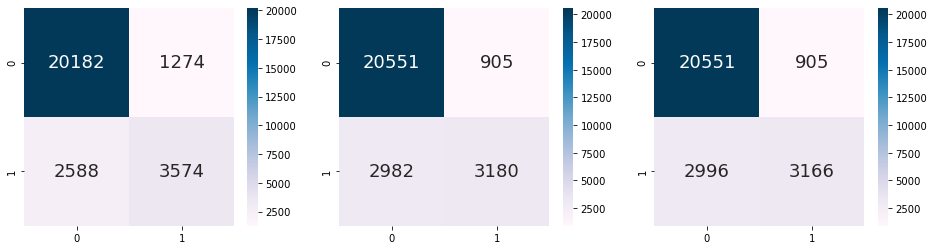

In [69]:
#Output the Accuracy, Recall, AUC and heatmap of the original parameters
print("\tAccuracy_original:{}".format(accuracy(y_test,y_pred_original)))
print("\tRecall_original:{}".format(recall(y_test,y_pred_original)))
print("\tAUC_original:{}".format(auc(y_test,preds_original)))
print()

#Output the Accuracy, Recall, AUC and heatmap of the previously used parameters
print("\tAccuracy_last:{}".format(accuracy(y_test,y_pred_last)))
print("\tRecall_last:{}".format(recall(y_test,y_pred_last)))
print("\tAUC_last:{}".format(auc(y_test,preds_last)))
print()

#Output the Accuracy, Recall, AUC and heatmap of the newly adjusted parameters
print("\tAccuracy_this:{}".format(accuracy(y_test,y_pred_this)))
print("\tRecall_this:{}".format(recall(y_test,y_pred_this)))
print("\tAUC_this:{}".format(auc(y_test,preds_this)))

# plot heatmap for three sets of parameters
f, axes = plt.subplots(1, 3, figsize=(16, 4))

sb.heatmap(cm(y_test,y_pred_original), annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0], cmap='PuBu')
sb.heatmap(cm(y_test,y_pred_last), annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1], cmap='PuBu')
sb.heatmap(cm(y_test,y_pred_this), annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[2], cmap='PuBu')

## 4.3 Results and Conclusion

### 4.3.1 Finalizing parameters and output Accuracy, Recall and Confusion Matrix

<font color=darkblue>**From above, we can obtain the relatively good parameters which have a high accuracy, high generalization ability and shorter time as follows.**

In [70]:
param_final = {'silent':True
              ,'obj':'binary:logistic'
              ,"subsample":1
              ,"max_depth":2
              ,"eta":0.15
              ,"gamma":0
              ,"lambda":1
              ,"alpha":0
              ,"colsample_bytree":1
              ,"colsample_bylevel":1
              ,"colsample_bynode":1
              ,"nfold":5}
num_round_final = 1500

In [71]:
%%time
# Train the model using finalized parameters
bst_final = xgb.train(param_final, d_train, num_round_final)

[15:26:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Wall time: 34.8 s


In [72]:
# Adjust threshold
newlist = []
for i in range(4500, 5500):
    preds_final = bst_final.predict(d_test)
    y_pred_final = preds_final.copy()
    y_pred_final[preds_final > float(i / 10000)] = 1
    y_pred_final[y_pred_final != 1] = 0
    newlist.append(accuracy(y_test,y_pred_final))
index = newlist.index(max(newlist))
thres = (float)(4500 + index) / 10000
print("\tThreshold:{}".format(thres))

	Threshold:0.4537


	Accuracy_final:0.8596567456006952
	Recall_final:0.5641025641025641


<AxesSubplot:>

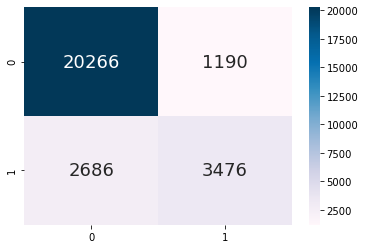

In [73]:
# Convert the probobilites predicted to 1 and 0
preds_final = bst_final.predict(d_test)
y_pred_final = preds_final.copy()
y_pred_final[preds_final > thres] = 1
y_pred_final[y_pred_final != 1] = 0

#Output the Accuracy, Recall, AUC and heatmap of the finalized parameters
print("\tAccuracy_final:{}".format(accuracy(y_test,y_pred_final)))
print("\tPrecision_final:{}".format(Precision(y_test,y_pred_final)))
print("\tRecall_final:{}".format(recall(y_test,y_pred_final)))

sb.heatmap(cm(y_test,y_pred_final), annot = True, fmt=".0f", annot_kws={"size": 18}, cmap='PuBu')

### 4.4.2 Find Important Features

In [77]:
# important features
feature_weight_dict = bst_final.get_score()
feature_name = list(feature_weight_dict)
feature_weight = list(feature_weight_dict.values())
new_dict = {
    "feature_name" : feature_name,
    "feature_weight" : feature_weight
}
weight = pd.DataFrame(new_dict).sort_values('feature_weight', ascending=False).reindex()
weight

,feature_name,feature_weight
3,Pressure3pm,487
23,Pressure9am,407
0,Humidity3pm,335
12,MaxTemp,259
2,WindGustSpeed,225
...,...,...
106,Location_Nhil,2
43,RainToday_No,1
109,WindDir9am_WSW,1
110,WindDir3pm_SE,1


In [78]:
# Extract 5 most bigest coeficients and 5 smallest coefficients
weight_large=weight[:5]
weight_small=weight[-5:]
weight_significant=pd.concat([weight_large,weight_small],axis=0)
weight_significant

,feature_name,feature_weight
3,Pressure3pm,487
23,Pressure9am,407
0,Humidity3pm,335
12,MaxTemp,259
2,WindGustSpeed,225
106,Location_Nhil,2
43,RainToday_No,1
109,WindDir9am_WSW,1
110,WindDir3pm_SE,1
112,WindDir9am_SW,1


<AxesSubplot:xlabel='feature_weight', ylabel='feature_name'>

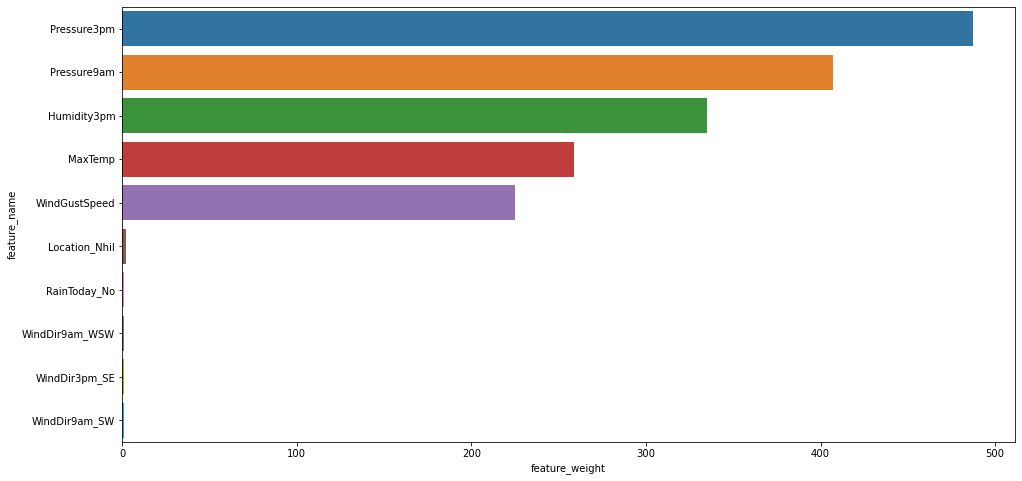

In [79]:
# Visualize weights of significant featurs
f=plt.figure(figsize=(16,8))
sb.barplot(y = "feature_name", x = 'feature_weight', data = weight_significant)

<font color=darkblue>**Pressure3pm(weight=487), Pressure9am(weight=407) and Humidity3pm(weight=335) are the 3 most significant features in predicting whether it will rain tomorrow**

### 4.4.3 Output ROC curve and AUC

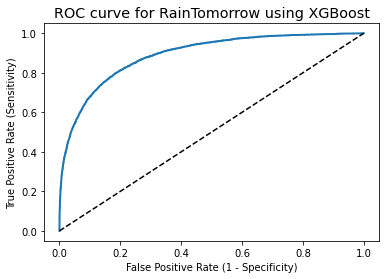

	AUC_final:0.889475610026912


In [80]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, preds_final, pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1],'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow using XGBoost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
print("\tAUC_final:{}".format(auc(y_test,preds_final)))

# 5. Logistic Regression

## 5.1 Feature Scaling

In [123]:
# Get all column names
cols = X_train.columns

In [64]:
# Feature Scaling (Make maximum value of all the columns equal to 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [125]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train.describe()

,RainToday_No,RainToday_Yes,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000,...,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000,110468.000000
mean,0.778370,0.221630,0.060470,0.056252,0.061221,0.063276,0.058732,0.046484,0.055708,0.060642,...,0.513692,0.613612,0.609977,0.516548,0.588066,0.517246,0.517437,0.574618,0.490818,0.490400
std,0.415345,0.415345,0.238357,0.230408,0.239737,0.243460,0.235123,0.210532,0.229359,0.238674,...,0.206762,0.112480,0.107850,0.254148,0.266091,0.140113,0.133798,0.253333,0.311979,0.293301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.370000,0.543802,0.540800,0.333333,0.500000,0.415948,0.420849,0.400000,0.181818,0.233333
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.520000,0.613223,0.609600,0.555556,0.625000,0.510776,0.505792,0.600000,0.454545,0.500000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.650000,0.684298,0.678400,0.666667,0.750000,0.616379,0.608108,0.800000,0.727273,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
X_test = pd.DataFrame(X_test, columns=[cols])

## 5.2 Logistic Regression

<font color=darkblue>**We first train the model using default parameters.**

In [65]:
%%time
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

Wall time: 1.38 s


LogisticRegression()

In [128]:
# Predict y_test
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
# Check train and test score
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8505
Test set score: 0.8498


### 5.2.1 Model Optimization (adjust solver)

In [130]:
%%time
# All the solvers in sklearn.LogisticRegression
solver=['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
train_accuracy=[]
test_accuracy=[]
# Train the model with different solvers and record their accuracy separately
for i in range(len(solver)):
    lr_sol = LogisticRegression(penalty='l2', solver=solver[i])
    lr_sol.fit(X_train,y_train)
    train_accuracy.append(lr_sol.score(X_train,y_train))
    test_accuracy.append(lr_sol.score(X_test,y_test))
    print(solver[i]+' finished.')

liblinear finished.
newton-cg finished.
lbfgs finished.
sag finished.
saga finished.
Wall time: 20 s


In [131]:
# Concat the train and test accuracy of different solvers into one dataframe
solver_accuracy=pd.DataFrame(solver,columns=['solver'])
solver_accuracy=pd.concat([solver_accuracy,pd.DataFrame(train_accuracy,columns=['train_accuracy'])],axis=1)
solver_accuracy=pd.concat([solver_accuracy,pd.DataFrame(test_accuracy,columns=['test_accuracy'])],axis=1)
solver_accuracy

,solver,train_accuracy,test_accuracy
0,liblinear,0.850409,0.849881
1,newton-cg,0.850518,0.849953
2,lbfgs,0.850463,0.849772
3,sag,0.850518,0.849953
4,saga,0.850518,0.849953


<font color=darkblue>**Since accuracy scores of train and test are nearly identical, over-fitting did not happen. Thus, it is suitable that we simply take penalty as 'L2'. (L1 is considered only when over-fitting occurs even with 'L2' penalty).**


In [132]:
# Sort from high to low according to test accuracy
solver_accuracy.sort_values('test_accuracy',ascending=False)

,solver,train_accuracy,test_accuracy
1,newton-cg,0.850518,0.849953
3,sag,0.850518,0.849953
4,saga,0.850518,0.849953
0,liblinear,0.850409,0.849881
2,lbfgs,0.850463,0.849772


<font color=darkblue>**From the dataframe we can see 'newton-cg' , 'sag' and 'saga' are the three solvers which have good performance in predicting the dataset. However, for big dataset, sag and saga are recomended as they will have a faster speed. Therefore, we choose these two solvers in the following optimization precess.**

### 5.2.2 Model Optimization (adjust parameter C)

<font color=darkblue>**C is the reciprocal of reuglirazation strength**

In [133]:
%%time
l1=[]
l2=[]
l1_test=[]
l2_test=[]

# Let C increase from 0.01 to 100 with 20 steps. Take sag and saga as solvers. 
# Record their train and test accuracy with different values of C.
for i in np.linspace(0.01,100,20):
    lr1=LogisticRegression(penalty='l2',solver='sag',random_state=0,C=i)
    lr2=LogisticRegression(penalty='l2',solver='saga',random_state=0,C=i)
    
    lr1=lr1.fit(X_train, y_train)
    l1.append(lr1.score(X_train,y_train))
    l1_test.append(lr1.score(X_test,y_test))
    
    lr2=lr2.fit(X_train, y_train)
    l2.append(lr2.score(X_train,y_train))
    l2_test.append(lr2.score(X_test,y_test))

Wall time: 6min 29s


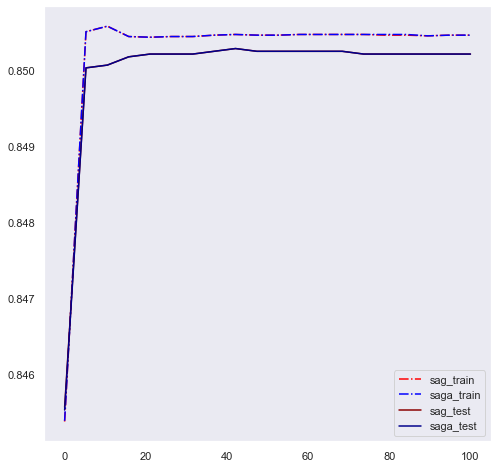

In [134]:
# Draw the learning curve of C in range(1,20)
graph=[l1,l2,l1_test,l2_test]
color=['red','blue','darkred','darkblue']
label=['sag_train','saga_train','sag_test','saga_test']
linestyle=['-.','-.','-','-']
plt.figure(figsize=(8,8))
for i in range(len(graph)):
    plt.plot(np.linspace(0.01,100,20),graph[i],color[i],label=label[i],linestyle=linestyle[i])
plt.legend(loc=4)
plt.grid()
plt.show()

<font color=darkblue>**The performances of sag and saga are almost the same. For the sake of convenience, we use saga as solver in the following process**

<font color=darkblue>**From the graph, we can see that the model has the best performance when C is in the range of 40-45. Thus, we zoom in to 40-45.**

In [135]:
%%time
saga=[]
saga_test=[]
k=0
# Let C increase from 40 to 45 with 10 steps.
# Record the train and test accuracy with different values of C.
for i in np.linspace(40,45,10):
    lr_saga=LogisticRegression(penalty='l2',solver='saga',random_state=0,C=i)
    
    lr_saga=lr_saga.fit(X_train, y_train)
    saga.append(lr_saga.score(X_train,y_train))
    saga_test.append(lr_saga.score(X_test,y_test))
    k=k+1
    print(k,'/10 finished, i = ',round(i))

1 /10 finished, i =  40
2 /10 finished, i =  41
3 /10 finished, i =  41
4 /10 finished, i =  42
5 /10 finished, i =  42
6 /10 finished, i =  43
7 /10 finished, i =  43
8 /10 finished, i =  44
9 /10 finished, i =  44
10 /10 finished, i =  45
Wall time: 2min 14s


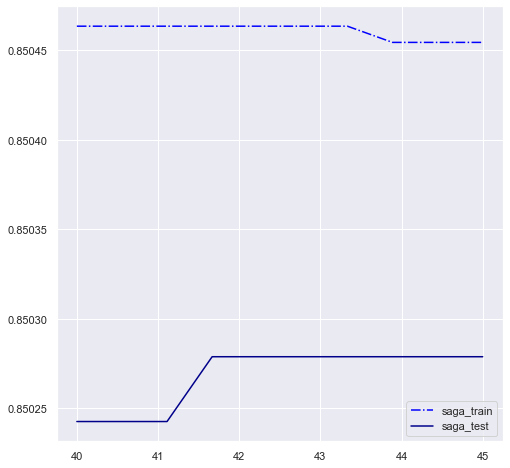

In [136]:
# Draw the learning curve of C in range(40,45)
graph=[saga,saga_test]
color=['blue','darkblue']
label=['saga_train','saga_test']
linestyle=['-.','-']
plt.figure(figsize=(8,8))
for i in range(len(graph)):
    plt.plot(np.linspace(40,45,10),graph[i],color[i],label=label[i],linestyle=linestyle[i])
plt.legend(loc=4)
plt.show()

<font color=darkblue>**To get the highest train and test accuracy, we choose C=42**

### 5.2.3 Model Optimization (adjust max_iter)

In [137]:
saga_iter=[]
saga_iter_test=[]
k=0

# Let max_iter increase from 1 to 201 with step length of 10.
# Record the train and test accuracy with different values of max_iter.
for i in np.arange(1,201,10):
    lr_saga_iter=LogisticRegression(penalty='l2',solver='saga',random_state=0,C=42,max_iter=i)
    lr_saga_iter=lr_saga_iter.fit(X_train,y_train)
    saga_iter.append(lr_saga_iter.score(X_train,y_train))
    saga_iter_test.append(lr_saga_iter.score(X_test,y_test))
    k=k+1
    print(k,'/20 finished,max_iter=',i)

1 /20 finished,max_iter= 1
2 /20 finished,max_iter= 11
3 /20 finished,max_iter= 21
4 /20 finished,max_iter= 31
5 /20 finished,max_iter= 41
6 /20 finished,max_iter= 51
7 /20 finished,max_iter= 61
8 /20 finished,max_iter= 71
9 /20 finished,max_iter= 81
10 /20 finished,max_iter= 91
11 /20 finished,max_iter= 101
12 /20 finished,max_iter= 111
13 /20 finished,max_iter= 121
14 /20 finished,max_iter= 131
15 /20 finished,max_iter= 141
16 /20 finished,max_iter= 151
17 /20 finished,max_iter= 161
18 /20 finished,max_iter= 171
19 /20 finished,max_iter= 181
20 /20 finished,max_iter= 191


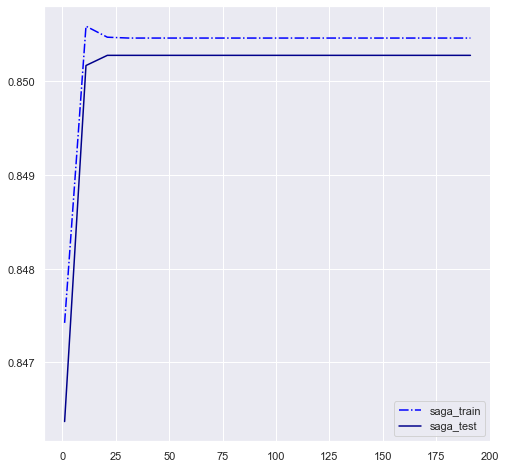

In [138]:
# Draw the learning curve of max_iter in range(1,191)
graph=[saga_iter,saga_iter_test]
color=['blue','darkblue']
label=['saga_train','saga_test']
linestyle=['-.','-']
plt.figure(figsize=(8,8))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i],linestyle=linestyle[i])
plt.legend(loc=4)
plt.show()

<font color=darkblue>**To get the highest train and test accuracy, we choose max_iter=100**

### 5.2.4 Model Optimization (adjust threshold)

<font color=darkblue>**To sum up, the optimal parameters of this model is solver = 'saga', penalty='l2', C=42 and max_iter=100. We will use these values as the finalized choice of parameters.**

In [139]:
%%time
# Final model.
lr_final=LogisticRegression(penalty='l2',solver='saga',random_state=0,C=42,max_iter=100)
lr_final=lr_final.fit(X_train,y_train)

Wall time: 12.3 s


In [140]:
# Predicted probability of whether it will rain tomorrow. 
y_pred = pd.DataFrame(data=lr_final.predict_proba(X_test),columns=['Prob of No rain tomorrow (0)', 
                                                                   'Prob of Rain tomorrow (1)'])

In [141]:
y_pred

,Prob of No rain tomorrow (0),Prob of Rain tomorrow (1)
0,0.980237,0.019763
1,0.930608,0.069392
2,0.839483,0.160517
3,0.959320,0.040680
4,0.955469,0.044531
...,...,...
27613,0.979419,0.020581
27614,0.460157,0.539843
27615,0.652308,0.347692
27616,0.598818,0.401182


Text(0, 0.5, 'Frequency')

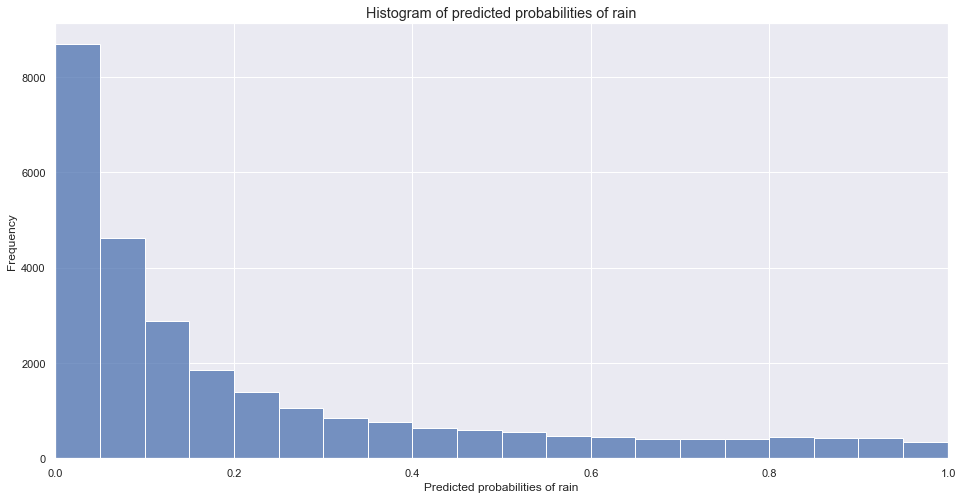

In [142]:
# plot histogram of predicted probabilities

# plot histogram with 20 bins
f = plt.figure(figsize=(16, 8))
sb.histplot(data = y_pred['Prob of Rain tomorrow (1)'],bins=20)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain',fontsize='large')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

<font color=darkblue>**From the histogram, we conclude that the probability is left skewed. Thus, we adjust the threshold to the left(<0.5) to see if it can help increase the accuracy.**

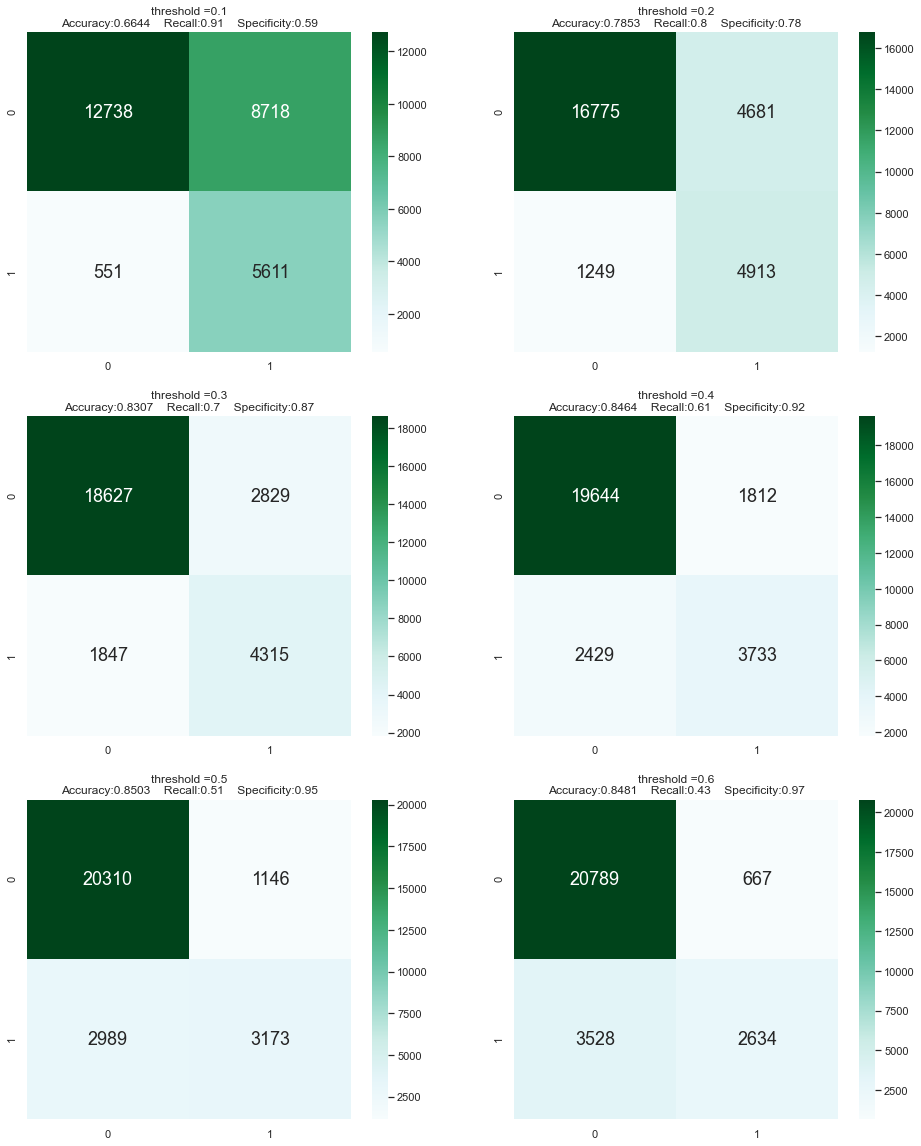

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import binarize
from sklearn.metrics import accuracy_score

f, axes = plt.subplots(3,2, figsize=(16,20))

# Adjust thrashold from 0.1 to 0.6 and draw the confusion matrix seperately.
for i in range(1,7):
    
    # Probability of rain tomorrow
    y_pred1 = lr_final.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    
    # Binarize y_pred1
    y_pred2 = binarize(y_pred1, i/10)

    # Confusion matrix
    cm1 = confusion_matrix(y_test, y_pred2)
    
    # Calculate accuracy, recall and specificity
    accuracy=round(accuracy_score(y_test, y_pred2),4)
    recall=round(cm1[1,1]/(float(cm1[1,1]+cm1[1,0])),2)
    specificity=round(cm1[0,0]/float(cm1[0,0]+cm1[0,1]),2)
    
    s='threshold ='+str(i/10)+'\nAccuracy:'+str(accuracy)+'    Recall:'+str(recall)+'    Specificity:'+str(specificity)
    
    plt.subplot(3,2,i)
    plt.title(s)
    sb.heatmap(confusion_matrix(y_test, y_pred2), annot = True, fmt=".0f", annot_kws={"size": 18},cmap='BuGn')
    

<font color=darkblue>**To get the optimal model(highest accuracy), we still choose threshold=0.5**

## 5.3 Apply 5-Fold Cross Validation

In [144]:
# Applying 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score

validation_scores = cross_val_score(lr_final, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(validation_scores))

Cross-validation scores:[0.84914456 0.85149814 0.84765095 0.84977142 0.84999774]


In [145]:
print('Average cross-validation score: {:.3f}'.format(validation_scores.mean()))

Average cross-validation score: 0.850


## 5.4 Plot ROC Curve

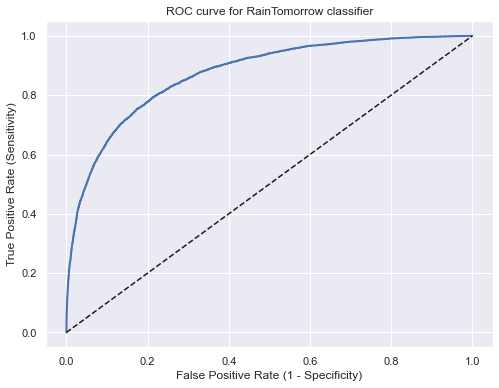

In [148]:
# plot ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [149]:
# calculate cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score

CV_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(CV_ROC_AUC))

Cross validated ROC AUC : 0.8735


## 5.5 Find Important features

In [150]:
# Find coefficient of all the features
Coef=pd.DataFrame(lr_final.coef_.reshape(-1,1),columns=['Coef'])
# Concat coefficient with corresponding features
Coef=pd.concat([Coef,pd.DataFrame(X_train.columns,columns=['column_name'])],axis=1)
Coef

,Coef,column_name
0,-1.041300,"(RainToday_No,)"
1,-1.316272,"(RainToday_Yes,)"
2,-0.202366,"(WindDir3pm_E,)"
3,-0.145905,"(WindDir3pm_ENE,)"
4,-0.244337,"(WindDir3pm_ESE,)"
...,...,...
113,1.385029,"(Temp9am,)"
114,1.203256,"(Temp3pm,)"
115,0.082814,"(Year,)"
116,0.086951,"(Month,)"


In [151]:
# Sort the dataframe according to coefficient of features from high to low
Coef_sort=Coef.sort_values('Coef',ascending=False)
Coef_sort

,Coef,column_name
109,8.791846,"(Pressure9am,)"
108,6.011597,"(Humidity3pm,)"
104,4.770127,"(WindGustSpeed,)"
113,1.385029,"(Temp9am,)"
114,1.203256,"(Temp3pm,)"
...,...,...
106,-1.220168,"(WindSpeed3pm,)"
1,-1.316272,"(RainToday_Yes,)"
103,-1.570456,"(Sunshine,)"
100,-2.830551,"(MaxTemp,)"


In [152]:
# Extract 5 most bigest coeficients and 5 smallest coefficients
Coef_large=Coef_sort[:5]
Coef_small=Coef_sort[-5:]
Coef_significant=pd.concat([Coef_large,Coef_small],axis=0)
Coef_significant

,Coef,column_name
109,8.791846,"(Pressure9am,)"
108,6.011597,"(Humidity3pm,)"
104,4.770127,"(WindGustSpeed,)"
113,1.385029,"(Temp9am,)"
114,1.203256,"(Temp3pm,)"
106,-1.220168,"(WindSpeed3pm,)"
1,-1.316272,"(RainToday_Yes,)"
103,-1.570456,"(Sunshine,)"
100,-2.830551,"(MaxTemp,)"
110,-12.550843,"(Pressure3pm,)"


<AxesSubplot:xlabel='Coef', ylabel='column_name'>

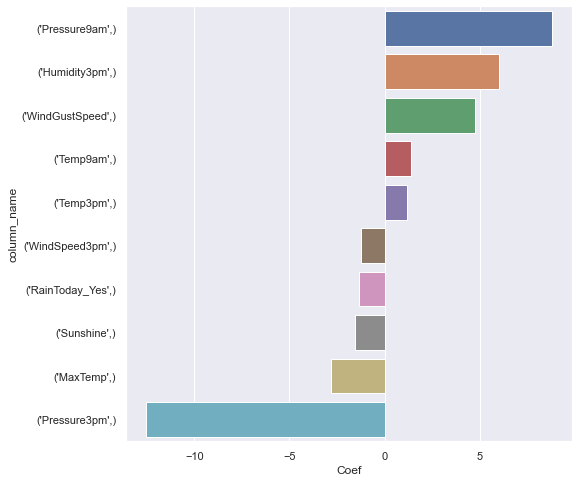

In [153]:
# Visualize coeficients of significant featurs
f=plt.figure(figsize=(8,8))
sb.barplot(y = "column_name", x = 'Coef', data = Coef_significant)

<font color=darkblue>**Pressure3pm(coef=-12.55), Pressure9am(coef=8.79) and Humidity3pm(coef=6.01) are the 3 most significant features in predicting whether it will rain tomorrow**

# 6. Comparison and Conclusion

## 6.1 Comparison between four defferent algorithm

### 6.1.0 Gather final models

In [230]:
# Import time for time recording
from time import time

In [231]:
# Decision Tree
begin = time()
dectree = DecisionTreeClassifier(max_depth=8                
                                ,min_samples_leaf=6         
                                ,random_state=5
                                ,max_features=96
                                ,criterion='entropy'
                                )
dectree.fit(X_train,y_train)
end = time()
time_dctree = end - begin
print("\t Time cost: {} sec".format(time_dctree))

	 Time cost: 1.1024701595306396 sec


In [232]:
# Random Forest
begin = time()
rfc = RandomForestClassifier(max_depth=61
                            ,random_state=50
                            ,n_estimators=178
                            ,min_samples_leaf=1
                            ,min_samples_split=2 
                            #,oob_score=True
                            ,max_features=61
                            ,n_jobs=-1
                            )

rfc.fit(X_train,y_train)
end = time()
time_rfc = end - begin
print("\t Time cost: {} sec".format(time_rfc))

	 Time cost: 43.681663513183594 sec


In [233]:
# XGBoost
begin = time()
param_final = {'silent':True
              ,'obj':'binary:logistic'
              ,"subsample":1
              ,"max_depth":2
              ,"eta":0.15
              ,"gamma":0
              ,"lambda":1
              ,"alpha":0
              ,"colsample_bytree":1
              ,"colsample_bylevel":1
              ,"colsample_bynode":1
              ,"nfold":5}
num_round_final = 1500
bst_final = xgb.train(param_final, d_train, num_round_final)
end = time()
time_xgb = end - begin
print("\t Time cost: {} sec".format(time_xgb))

[13:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "nfold", "obj", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


	 Time cost: 37.986398696899414 sec


In [234]:
# Logistic Regression
begin = time()
lr_final=LogisticRegression(penalty='l2',solver='saga',random_state=0,C=42,max_iter=100)
lr_final=lr_final.fit(X_train,y_train)
end = time()
time_lr = end - begin
print("\t Time cost: {} sec".format(time_lr))

	 Time cost: 13.58149790763855 sec


### 6.1.1 Compare Time Cost

In [235]:
# Build dataframe of time
algo_list = ['DecisionTree', 'RandomForest', 'XGBoost', 'LogisticRegression']
time_list = []
time_list.append(time_dctree)
time_list.append(time_rfc)
time_list.append(time_xgb)
time_list.append(time_lr)
time_dict = {'Algorithm':algo_list,'Time': time_list}
time_cost = pd.DataFrame(time_dict)
time_cost.sort_values('Time', inplace=True)

<AxesSubplot:xlabel='Algorithm', ylabel='Time'>

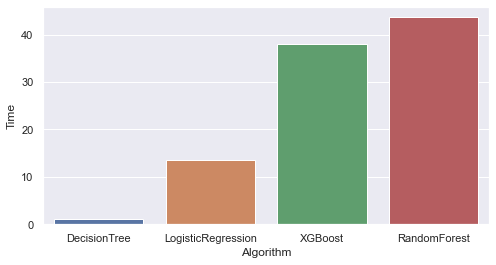

In [236]:
# Visualize time cost for four model
f=plt.figure(figsize=(8,4))
sb.barplot(y = "Time", x = 'Algorithm', data = time_cost)

### 6.1.2 Compare Accuracy, precision & recall

In [237]:
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, precision_score as precision

In [238]:
# list for accuracy
com_acc = []
# list for precision
com_pre = []
# list for recall
com_rec = []

In [239]:
# Add accuracy numbers to the list

com_acc.append(dectree.score(X_test, y_test))

com_acc.append(rfc.score(X_test, y_test))

preds_xgb = bst_final.predict(d_test)
y_pred_xgb = preds_xgb.copy()
y_pred_xgb[preds_final > 0.4537] = 1
y_pred_xgb[y_pred_xgb != 1] = 0
com_acc.append(accuracy(y_test,y_pred_xgb))

com_acc.append(lr_final.score(X_test, y_test))

com_acc

[0.844087189514085, 0.8593670794409443, 0.8596567456006952, 0.8449199797233689]

In [240]:
# Append precision numbers to the lsit
y_pred_dectree = dectree.predict(X_test)
com_pre.append(precision(y_test, y_pred_dectree))

y_pred_rfc = rfc.predict(X_test)
com_pre.append(precision(y_test, y_pred_rfc))

com_pre.append(precision(y_test,y_pred_xgb))

y_pred_lr = lr_final.predict(X_test)
com_pre.append(precision(y_test, y_pred_lr))

com_pre

[0.7310756972111554,
 0.7734037445991359,
 0.7449635662237463,
 0.7252457444257971]

In [241]:
#Append recall numbers to the list
com_rec.append(recall(y_test, y_pred_dectree))
com_rec.append(recall(y_test, y_pred_rfc))
com_rec.append(recall(y_test,y_pred_xgb))
com_rec.append(recall(y_test, y_pred_lr))
com_rec

[0.4764686790003246,
 0.5228821811100293,
 0.5641025641025641,
 0.49091204154495294]

In [242]:
# Covert lists to DataFrame
dic1 = {
    'Algorithm':algo_list,
    'Accuracy':com_acc,
    'Precision':com_pre,
    'Recall':com_rec
}
data_com = pd.DataFrame(dic1)
data_com

,Algorithm,Accuracy,Precision,Recall
0,DecisionTree,0.844087,0.731076,0.476469
1,RandomForest,0.859367,0.773404,0.522882
2,XGBoost,0.859657,0.744964,0.564103
3,LogisticRegression,0.844920,0.725246,0.490912


<AxesSubplot:xlabel='Algorithm'>

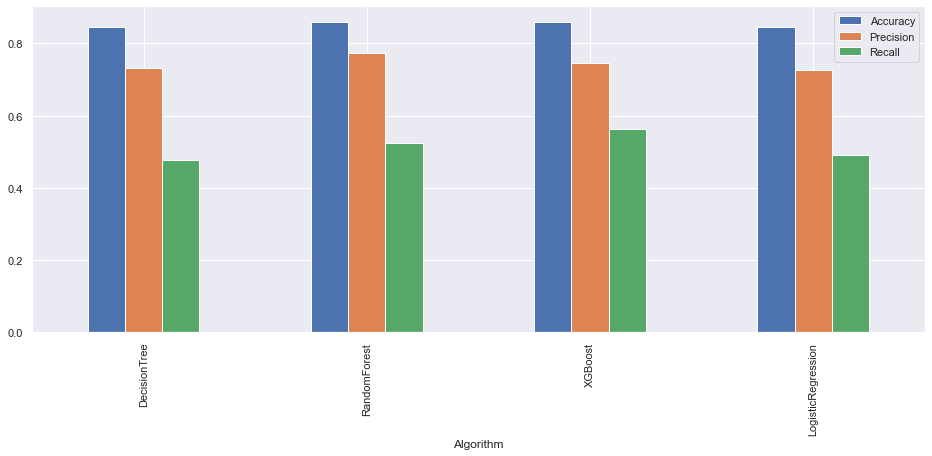

In [243]:
# Visualize data
data_com.plot.bar(figsize = (16,6), x='Algorithm')

### 6.1.3 Three Most Important Features

In [244]:
# Decision Tree
importance_dectree = pd.DataFrame(dectree.feature_importances_, columns=['Importance'])
feature_name = pd.DataFrame(X_train.columns, columns=['Feature'])
importance_dectree=pd.concat([importance_dectree, feature_name],axis=1)
importance_dectree = importance_dectree.sort_values('Importance', ascending=False)
most_impo_dectree = importance_dectree[:3]
most_impo_dectree

,Importance,Feature
108,0.618847,Humidity3pm
104,0.107129,WindGustSpeed
110,0.081540,Pressure3pm


In [245]:
# Random Forest
importance_rfc = pd.DataFrame(rfc.feature_importances_, columns=['Importance'])
feature_name = pd.DataFrame(X_train.columns, columns=['Feature'])
importance_rfc = pd.concat([importance_rfc, feature_name],axis=1)
importance_rfc = importance_rfc.sort_values('Importance', ascending=False)
most_impo_rfc = importance_rfc[:3]
most_impo_rfc

,Importance,Feature
108,0.225927,Humidity3pm
110,0.056080,Pressure3pm
104,0.052979,WindGustSpeed


In [246]:
# XGBoost
weight_dict_xgb = bst_final.get_score()
feature_name_list = list(weight_dict_xgb)
feature_weight = list(weight_dict_xgb.values())
dic_xgb = {
    "Weight" : feature_weight,
    "Feature" : feature_name_list,
}
weight = pd.DataFrame(dic_xgb).sort_values('Weight', ascending=False)
most_impo_xgb = weight[:3]
most_impo_xgb                                       

,Weight,Feature
3,487,Pressure3pm
23,407,Pressure9am
0,335,Humidity3pm


In [247]:
# Logistic Regression
coef_lr=pd.DataFrame(lr_final.coef_.reshape(-1,1),columns=['Coef'])
coef_lr=pd.concat([coef_lr,pd.DataFrame(X_train.columns,columns=['Feature'])],axis=1)
coef_lr = coef_lr.sort_values('Coef', ascending=False)
most_impo_lr = coef_lr[:3]
most_impo_lr

,Coef,Feature
112,0.090360,Cloud3pm
101,0.072573,Rainfall
108,0.056254,Humidity3pm


### 6.1.4 Compare ROC curves & AUC scores

In [254]:
from sklearn.metrics import roc_curve, roc_auc_score as auc

In [255]:
# list for auc scores
auc_score = []

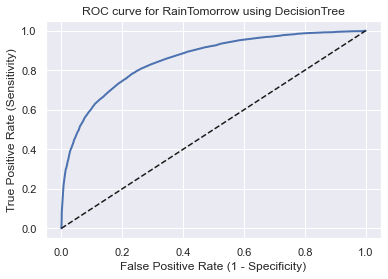

	AUC:0.8559642435136234


In [256]:
# Decision Tree
y_proba_dectree = dectree.predict_proba(X_test)[:,1].reshape(-1,1)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dectree, pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1],'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow using DecisionTree')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

auc_dectree = auc(y_test,y_proba_dectree)
auc_score.append(auc_dectree)
print("\tAUC:{}".format(auc_dectree))

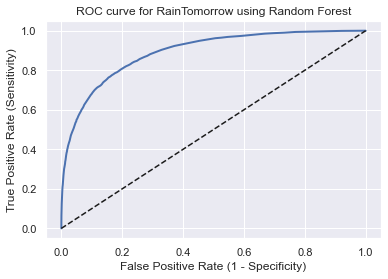

	AUC:0.8909415109106087


In [257]:
# Random Forest
y_proba_rfc = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rfc, pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1],'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow using Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

auc_rfc = auc(y_test,y_proba_rfc)
auc_score.append(auc_rfc)
print("\tAUC:{}".format(auc_rfc))

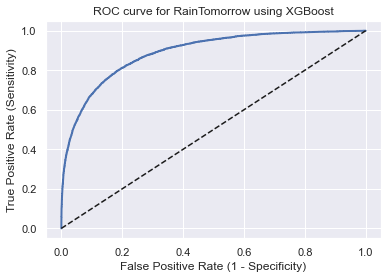

	AUC:0.889475610026912


In [258]:
# XGBoost
fpr, tpr, thresholds = roc_curve(y_test, preds_xgb, pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1],'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow using XGBoost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

auc_xgb = auc(y_test,preds_final)
auc_score.append(auc_xgb)
print("\tAUC:{}".format(auc_xgb))

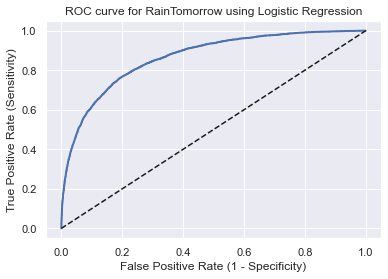

	AUC:0.8643616588380203


In [259]:
# Logistic Regression
y_proba_lr = lr_final.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr, pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1],'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow using Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

auc_lr = auc(y_test,y_proba_lr)
auc_score.append(auc_lr)
print("\tAUC:{}".format(auc_lr))

<AxesSubplot:xlabel='Algorithm', ylabel='AUC_score'>

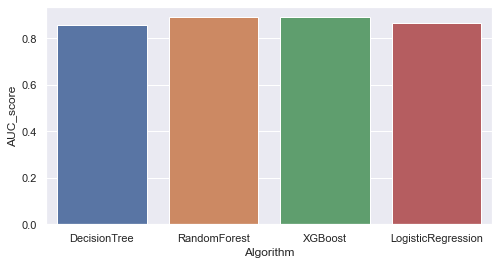

In [269]:
# Visualize AUC score
auc_score
auc_dict = {
    'Algorithm':algo_list,
    'AUC_score': auc_score
}
auc_data = pd.DataFrame(auc_dict)

f=plt.figure(figsize=(8,4))
sb.barplot(data = auc_data, x='Algorithm', y='AUC_score', )

## 6.2 Conclusion

<font color=darkblue>**conclusion to fill in**